In [1]:
# %display latex

In [2]:
from IPython.display import display, Math, Latex


def disp(ex):
    display(Math(latex(ex)))

In [3]:
kappa = var("kappa")

z = var("z")
rh = var("rho")
ph = var("varphi")

c = var("c")
omega = var("omega")

a = var("a")
b = var("b")

m = var("m")

assume(kappa, "real")
assume(kappa > 0)

assume(z, "real")
assume(rh, "real")
assume(rh > 0)
assume(ph, "real")

assume(c, "real")
assume(c > 0)
assume(omega, "real")
assume(omega > 0)

assume(a, "real")
assume(a > 0)
assume(b, "real")
assume(b > 0)

assume(m, "real")
assume(m >= 0)

m_val = 0
n_val = 0
h_val = 0

E_mode = True
n_layers = 2

a_val = 12
phi_arr = [0, pi/4, pi/2, 3*pi/4, pi, 5*pi/4, 3*pi/2, 7*pi/4, 2*pi]

In [4]:
def m_bessel_J_div_x (m, x):
    if 0 == x:
        if 1 == m:
            return 1/2
        return 0
    return m * bessel_J(m, x)/(x)

def bessel_J_diff(m, arg):
    return bessel_J(m, x).diff(x).subs(x == arg)

In [5]:
exec(preparse("bessel_J_d = lambda m, x: " + str(bessel_J(m,x).diff(x)) +""))

In [6]:
def find_newton_root(f,x,xn, debug = False):
    if debug:
        print("find_newton_root f =", f)
    df = f.diff(x)
    if debug:
        print ("df", df)
        print ("f/df", f/df)
    step = 1.0
    #NewtonIt = lambda x_, step : x_-step*(f/df).subs(x == x_)
    #xn=(a+b)/2;                      # initial guess
    
    def NewtonIt(_x, step):
        if debug:
            print("_x", _x)
        delta = (f/df).subs(x == _x)
        if debug:
            print("delta", delta)
            print("step", step)
        step_delta = step*delta
        if debug:
            print("step_delta", step_delta)

        res = _x-step_delta
        if debug:
            print ("_x-step_delta", _x-step_delta)
            print ("res", res)
        return res
    
    if debug:
        print ("xn", xn)
    for i in range(20):
        #xn=N(NewtonIt(xn, step), digits=32)
        if float != type(xn):
            xn = xn.n()
        xn=NewtonIt(xn, step)
        if float != type(xn):
            xn = xn.n()
        if debug:
            print ("xn", xn)

        if debug:
            f_n = f.subs(x == xn)
            print ("f_n", f_n)
        #step *= 0.999

    return xn

In [7]:
tol=0.000000000001
def find_root_recursive(func,a,b,tol=0.000000000001, debug = False):
    if len(func.variables()) != 1:
        print("find_root_recursive error func.variables()", func.variables())
        return
    try:
        free_variable = func.variables()[0]
    except:
        free_variable = x
    if debug:
        print("func.variables()", func.variables())
        print("free_variable", free_variable)
        print("func", func(1))
    L = []
    if b - a < tol:
        return L
    try:
        if debug:
            print ("a = ", a, "b = ", b)
            print (func(free_variable=a), func(free_variable=b))
        
        x0 = find_root(func,a,b)
        if type(x0) is not float:
            x0 = x0.n()
        if debug:
            print ("x0 =", x0, "f(x0)=", func(x=x0))

        x0_newton_prec = find_newton_root(f=func, x=free_variable, xn=x0)
        if type(x0_newton_prec) is not float:
            x0_newton_prec = x0_newton_prec.n()
    
        if debug:
            print ("x0_newton_prec =", x0_newton_prec, "f(x0_newton_prec)=", func(x=x0_newton_prec))
        
        L.append(x0_newton_prec)
        
        L += find_root_recursive(func,a,x0-tol,tol)       
        L += find_root_recursive(func,x0+tol,b,tol)       
    except Exception as ex:
        if 'f appears to have no zero on the interval' != str(ex):
            if debug:
                print(str(ex))
                print ("a = ", a, "b = ", b)
                print (func(free_variable=a), func(free_variable=b))
                exec("print(func(" + preparse(str(free_variable)) + "=a))")
                exec("print(func(" + preparse(str(free_variable)) + "=b))")
                plot(func, (free_variable, a, b)).show()
            
            xn = (a + b) / 2
            if debug:
                print("xn =", xn)
            x0 = find_newton_root(func, free_variable, xn, debug=False)
            if type(x0) is not float:
                x0 = x0.n()
            if debug:
                print("x0 found by Newton method =", x0)
            L.append(x0)
        pass
    return L

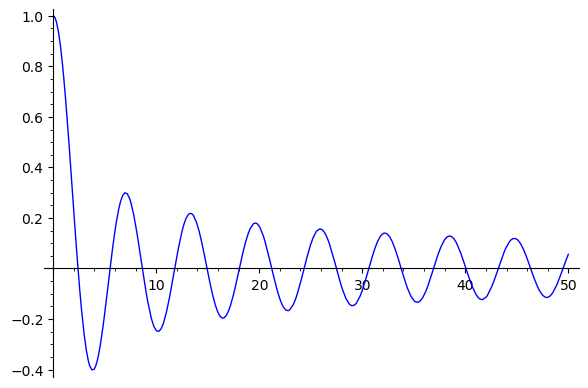

[2.40482555769577,
 5.52007811028631,
 8.65372791291101,
 11.7915344390143,
 14.9309177084878,
 18.0710639679109,
 21.2116366298793,
 24.3524715307493,
 27.4934791320403,
 30.6346064684320,
 33.7758202135736,
 36.9170983536640,
 40.0584257646282,
 43.1997917131767,
 46.3411883716618,
 49.4826098973978]

In [8]:
plot(bessel_J(m_val,x),0.1,50).show()
first_bessel_roots = find_root_recursive(bessel_J(m_val,x),0.1,50)
first_bessel_roots.sort()
first_bessel_roots

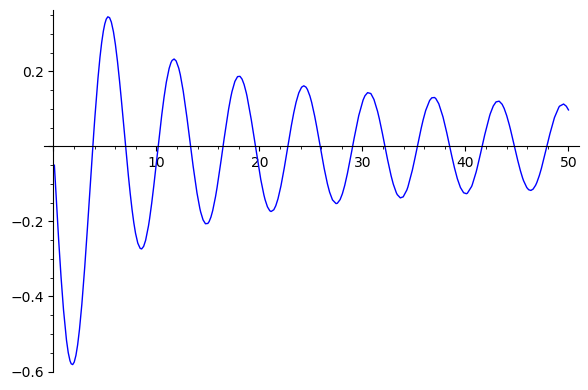

[3.83170597020751,
 7.01558666981562,
 10.1734681350627,
 13.3236919363142,
 16.4706300508776,
 19.6158585104682,
 22.7600843805928,
 25.9036720876184,
 29.0468285349169,
 32.1896799109744,
 35.3323075500839,
 38.4747662347716,
 41.6170942128145,
 44.7593189976528,
 47.9014608871855]

In [9]:
plot(bessel_J_d(m_val,x),0.1,50).show()
first_bessel_d_roots = find_root_recursive(bessel_J_d(m_val,x),0.1,50)
first_bessel_d_roots.sort()
first_bessel_d_roots

In [10]:
mu = []
for i in range(n_layers):
    exec("mu_" + str(i) + "= var('mu_" + str(i) + "')")
    exec("assume(mu_" + str(i) + ", 'real')")
    exec("assume(mu_" + str(i) + " > 0)")
    exec("mu += [mu_" + str(i) +"]")

In [11]:
epsilon = []
for i in range(n_layers):
    exec("epsilon_" + str(i) + "= var('epsilon_" + str(i) + "')")
    exec("assume(epsilon_" + str(i) + ", 'real')")
    exec("assume(epsilon_" + str(i) + " > 0)")
    exec("epsilon += [epsilon_" + str(i) +"]")

In [12]:
sigma = []
for i in range(n_layers):
    exec("sigma_" + str(i) + "= var('sigma_" + str(i) + "')")
    exec("assume(sigma_" + str(i) + ", 'real')")
    exec("assume(sigma_" + str(i) + " > 0)")
    exec("sigma += [sigma_" + str(i) +"]")

In [13]:
g = []
for i in range(n_layers):
    exec("g_" + str(i) + "= var('g_" + str(i) + "')")
    exec("assume(g_" + str(i) + ", 'real')")
    exec("assume(g_" + str(i) + " > 0)")
    exec("g += [g_" + str(i) +"]")

In [14]:
h = []
for i in range(n_layers):
    exec("h_" + str(i) + "= var('h_" + str(i) + "')")
    exec("assume(h_" + str(i) + ", 'real')")
    exec("assume(h_" + str(i) + " > 0)")
    exec("h += [h_" + str(i) +"]")

In [15]:
A_z = []
for i in range(n_layers):
    exec("A_z_" + str(i) + "= var('A_z_" + str(i) + "')")
    exec("assume(A_z_" + str(i) + ", 'real')")
    exec("A_z += [A_z_" + str(i) +"]")

In [16]:
B_z = []
for i in range(n_layers):
    exec("B_z_" + str(i) + "= var('B_z_" + str(i) + "')")
    exec("assume(B_z_" + str(i) + ", 'real')")
    exec("B_z += [B_z_" + str(i) +"]")

In [17]:
C_z = []
for i in range(n_layers):
    exec("C_z_" + str(i) + "= var('C_z_" + str(i) + "')")
    exec("assume(C_z_" + str(i) + ", 'real')")
    exec("C_z += [C_z_" + str(i) +"]")

In [18]:
D_z = []
for i in range(n_layers):
    exec("D_z_" + str(i) + "= var('D_z_" + str(i) + "')")
    exec("assume(D_z_" + str(i) + ", 'real')")
    exec("D_z += [D_z_" + str(i) +"]")

In [19]:
k = []
for i in range(n_layers):
    exec("k_" + str(i) + "= var('k_" + str(i) + "')")
    exec("assume(k_" + str(i) + ", 'real')")
    exec("k += [k_" + str(i) +"]")

In [20]:
sigma_m = []
for i in range(2):
    exec("sigma_m" + str(i) + "= var('sigma_m" + str(i) + "')")
    exec("assume(sigma_m" + str(i) + ", 'real')")
    exec("assume(sigma_m" + str(i) + " > 0)")
    exec("sigma_m += [sigma_m" + str(i) +"]")

In [21]:
k_m = []
for i in range(2):
    exec("k_m" + str(i) + "= var('k_m" + str(i) + "')")
    exec("assume(k_m" + str(i) + ", 'real')")
    exec("k_m += [k_m" + str(i) +"]")

In [22]:
s_m = []
for i in range(2):
    exec("s_m" + str(i) + "= var('s_m" + str(i) + "')")
    exec("assume(s_m" + str(i) + ", 'real')")
    exec("s_m += [s_m" + str(i) +"]")

$\vec{E} = \vec{E}\,e^{-i\,\omega\,t}$

$\vec{H} = \vec{H}\,e^{-i\,\omega\,t}$


$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c}\vec{j}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E} + \frac{4\pi}{c} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} \vec{E}  + \frac{4\pi}{c} \sigma \vec{E} \right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} \vec{E} + \mu\,\frac{4\pi\,i\,\omega}{c^2} \sigma \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $


$rot\,rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} rot\, \vec{E}  + \frac{4\pi}{c} \sigma rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) rot\,\vec{E}$

$rot\,rot\,\vec{H} = \left(- \frac{i\,\omega}{c} \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\left(\frac{\omega^2}{c^2} \epsilon_{\alpha\,\beta} + i\,\frac{4\pi\omega}{c^2} \sigma \right)\,\vec{H}$

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

Ищем решение в виде

$E_{z}\left({\rho}, {\phi}, \mathit{z}\right) = E_{z}(\rho)\,E_{z}(\phi)\,E_{z}(z)$

$H_{z}\left({\rho}, {\phi}, \mathit{z}\right) = H_{z}(\rho)\,H_{z}(\phi)\,H_{z}(z)$


подставляя в исходное уравнение

In [23]:
# подставляя в исходное уравнение 
if True:
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    H = ES.vector_field(
        function('H_rho_rho')(rho) * function('H_rho_phi')(phi) * function('H_rho_z')(zz),
        function('H_phi_pho')(rho) * function('H_phi_phi')(phi) * function('H_phi_z')(zz),
        function('H_z_rho')  (rho) * function('H_z_phi')  (phi) * function('H_z_z')  (zz),
        name='H')

    E = ES.vector_field(
        function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
        function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
        function('E_z_rho')  (rho) * function('E_z_phi')  (phi) * function('E_z_z')  (zz),
        name='E')

    E = ES.vector_field(
        function('E_rho')(rho,phi,zz),
        function('E_phi')(rho,phi,zz),
        function('E_z')(rho,phi,zz),
        name='E')
    
    H = ES.vector_field(
        function('H_rho')(rho,phi,zz),
        function('H_phi')(rho,phi,zz),
        function('H_z')(rho,phi,zz),
        name='H')
    
    #E = ES.vector_field(
    #    function('E_rho_rho')(rho) * function('E_rho_phi')(phi) * function('E_rho_z')(zz),
    #    function('E_phi_pho')(rho) * function('E_phi_phi')(phi) * function('E_phi_z')(zz),
    #    function('E_z_rho')  (rho) * cos(m*phi) * e^(I*k[0]*zz),
    #    name='E')
    
    from sage.manifolds.operators import curl, laplacian
    rot_rot_E = curl(curl(E))
    rot_rot_H = curl(curl(H))
    laplacian_E = laplacian(E)
    laplacian_H = laplacian(H)

    #print (rot_rot_E.display())
    #print (rot_rot_H.display())
    #print (laplacian_E.display())
    
    #eq_z = (rot_rot_E[3] - mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand()
    #display(Math(latex(eq_z.expr())))
    
    eq_zE = (laplacian_E[3] + mu[0] * epsilon[0] * omega^2 / c^2 * E[3]).expand().expr() == 0
    display(Math(latex(eq_zE)))
    
        
    eq_zH = (laplacian_H[3] + mu[0] * epsilon[0] * omega^2 / c^2 * H[3]).expand().expr() == 0
    display(Math(latex(eq_zH)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

we have 

$\frac{\epsilon \mu \omega^{2} E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right) + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z}\left({\rho}, {\phi}, \mathit{z}\right)$


$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$

assuming

$E_{z}(\phi) = sin(m\,\varphi + \psi_{m})$

and

$E_{z}(z) = e^{i\,k\,z}$

or

$E_{z}(z) = cos\left(k\,z\right)$
or
$E_{z}(z) = sin\left(k\,z\right)$

приходим к обыкновенному дифференциальному уравнению

we arrive to the ordinary differential equation

$$\frac{\epsilon \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$$

assuming

$\kappa^2 = \frac{\mu \, \epsilon \, \omega^2}{c^2} - k^2$

we will receive equation of Bessel type

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$


In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega}\,i$ we have

$$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$$

assuming for metals

$E_{z}(z) = e^{i\,k'\,z}$

with complex $k' = k + i\,s$

$E_{z}(z) = e^{i\,k\,z} \, e^{-s\,z}$

$$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \mu \omega^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k'^2\,E_{z} = 0$$

we will receive

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} - k'^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$

$k'^2 
= \left(k + i\,s \right)^2
= k^2 - s^2 + 2\,i\,k\,s$

expanding

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2}
+\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2}
- k^2 + s^2 - 2\,i\,k\,s
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$- 2\,i\,k\,s +\frac{\mu \, \left( \frac{4\pi\,\sigma}{\omega}\,i  \right) \, \omega^2}{c^2} = 0 $

$2\,k\,s = \frac{4\pi\,\mu\,\sigma\,\omega}{c^2}$

assuming now

$\kappa^2 = \frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2} - k^2 + s^2$

$s = \frac{2\pi\,\mu\,\sigma\,\omega}{k\,c^2}$

$\kappa^2 = \frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega^2}{c^2} - k^2 + \left(\frac{2\pi\,\mu\,\sigma\,\omega}{k\,c^2}\right)^2$

we again have equation of Bessel type


$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$

Dielectrics

assuming for dielectrics

$$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega'\,t}$$

with complex $\omega' = \omega - i\,\alpha$

$$E_{z}(z,t) = e^{i\,k\,z}\,e^{-i\,\omega\,t} \, e^{-\alpha\,t}$$

In case of complex $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega'}\,i$ we have

$$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}} + \frac{\frac{\partial^{2}}{(\partial {\phi})^{2}}E_{z}}{{\rho}^{2}} + \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\partial^{2}}{(\partial \mathit{z})^{2}}E_{z} = 0$$



$$\frac{\left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \mu \omega'^{2} E_{z}}{c^{2}} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
- \frac{m^{2}\,E_{z}}{{\rho}^{2}}
+ \frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z}
- k^2\,E_{z} = 0$$

we will receive

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\frac{\mu \, \left(\epsilon_{\alpha\,\beta} + \frac{4\pi\,\sigma}{\omega'}\,i  \right) \, \omega'^2}{c^2} - k^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$

$\omega'^2 
= \left(\omega - i\,\alpha \right)^2
= \omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha$

expanding

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \omega'^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\omega'}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \left(\epsilon_{\alpha\,\beta} \right) \, \left(\omega^2 - \alpha^2 - 2\,i\,\omega\,\alpha\right)}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\omega - i\,\alpha \right)}{c^2}\,i
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta} \, \omega^2}{c^2}
-\frac{\mu \, \epsilon_{\alpha\,\beta} \, \alpha^2}{c^2}
-\frac{2\,\omega\,\alpha\,\mu \,\epsilon_{\alpha\,\beta} \, }{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\omega}{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\alpha}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$-\frac{2\,\omega\,\alpha\, \mu \, \epsilon_{\alpha\,\beta} \, }{c^2}\,i
+\frac{4\pi\,\mu \, \sigma\,\omega}{c^2}\,i = 0$

$2\pi\,\sigma = \epsilon_{\alpha\,\beta}\,\alpha$

$\alpha = \frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}$

\begin{equation}
\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta} \, \omega^2}{c^2}
-\frac{\mu \, \epsilon_{\alpha\,\beta} \, \alpha^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\alpha}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0
\end{equation}

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \epsilon_{\alpha\,\beta} \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{4\pi\,\mu \, \sigma\,\left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
-\frac{\mu \, \epsilon_{\alpha\,\beta} \, \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}}\right)^2}{c^2}
+\frac{2\,\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}\omega^2}{c^2}
+\frac{\mu \,\epsilon_{\alpha\,\beta} \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2}{c^2}
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} 
+ \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(
\frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2
- \frac{m^{2}}{{\rho}^{2}}
\right)
\,E_{z} = 0$$

assuming now

$$\kappa^2 = \frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2$$

we again have equation of Bessel type


$$\frac{\partial^{2}}{(\partial {\rho})^{2}}E_{z} + \frac{\frac{\partial}{\partial {\rho}}E_{z}}{{\rho}}
+ \left(\kappa^2 - \frac{m^{2}}{{\rho}^{2}}\right)\,E_{z} = 0$$

In [24]:
# исходя из вида дифференциальных уравнений для metal
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_metal = []
eq_s_metal = []
for i in range(2):
    eq_kappa_metal += [omega^2 / c^2 - k_m[i]^2 + s_m[i]^2 == kappa^2]
    eq_s_metal     += [4 * pi * sigma_m[i] * omega / c^2 == 2 * k_m[i] * s_m[i]]

display(Math(latex(eq_kappa_metal)))
display(Math(latex(eq_s_metal)))

eq_kappa_metal_s = []
for i in range(2):
    eq_kappa_metal_s += [eq_kappa_metal[i].subs(solve(eq_s_metal[i],s_m[i]))]

display(Math(latex(eq_kappa_metal_s)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa = []
for i in range(n_layers):
    eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]

display(Math(latex(eq_kappa)))

<IPython.core.display.Math object>

assuming for dielectric

$$\kappa^2 = \frac{\mu \, \epsilon_{\alpha\,\beta}}{c^2}\left(\omega^2 + \left(\frac{2\,\pi\,\sigma}{\epsilon_{\alpha\,\beta}} \right)^2\right)
- k^2$$

In [26]:
# исходя из вида дифференциальных уравнений для диэлектрика
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_dielectric = []
for i in range(n_layers):
    eq_kappa_dielectric += [kappa^2 == mu[i] * epsilon[i] / c^2 * (omega^2 + (2*pi*sigma[i]/epsilon[i])^2) - k[i]^2]

display(Math(latex(eq_kappa_dielectric)))

<IPython.core.display.Math object>

In [27]:
if True:
    i_layer = 0
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')

    kk = var("kk")
    assume(kk, "real")
    
    assume(rho, "real")
    assume(phi, "real")
    assume(zz, "real")
    
    E1 = ES.vector_field(
        function('E1_rho')(rho,phi) * e^(I*kk*zz),
        function('E1_phi')(rho,phi) * e^(I*kk*zz),
        function('E1_z')  (rho,phi) * e^(I*kk*zz),
        name='E1')
    
    H1 = ES.vector_field(
        function('H1_rho')(rho,phi) * e^(I*kk*zz),
        function('H1_phi')(rho,phi) * e^(I*kk*zz),
        function('H1_z')  (rho,phi) * e^(I*kk*zz),
        name='H1')
    
    from sage.manifolds.operators import curl, laplacian
    rot_E1 = curl(E1)
    rot_H1 = curl(H1)
    
    eq_rot_E1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_E1 += [ (I * omega * mu[i_layer] / c * H1[j].expr() == rot_E1[j].expr()).expand() ]
    display(Math(latex(eq_rot_E1)))
    
    eq_rot_H1 = []
    for j in ES.irange():
        if j != 3:
            eq_rot_H1 += [ (- I * omega / c * epsilon[i_layer] * E1[j].expr() == rot_H1[j].expr()).expand() ]
    display(Math(latex(eq_rot_H1)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [28]:
E_phi_sol_1 = solve(eq_rot_E1[0], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_1)))
E_phi_sol_2 = solve(eq_rot_H1[1], function('E1_phi')(rho,phi))
#display(Math(latex(E_phi_sol_2)))

In [29]:
H_rho_sol_1 = solve(eq_rot_E1[0], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_1)))
H_rho_sol_2 = solve(eq_rot_H1[1], function('H1_rho')(rho,phi))
#display(Math(latex(H_rho_sol_2)))

In [30]:
E_phi_solution = solve(E_phi_sol_1[0].subs(H_rho_sol_2),function('E1_phi')(rho,phi) )
#display(Math(latex(E_phi_sol)))
E_phi_solution = solve(E_phi_sol_2[0].subs(H_rho_sol_1),function('E1_phi')(rho,phi) )
display(Math(latex(E_phi_solution)))

<IPython.core.display.Math object>

In [31]:
H_rho_solution = solve(H_rho_sol_1[0].subs(E_phi_sol_2),function('H1_rho')(rho,phi) )
#display(Math(latex(H_rho_sol)))
H_rho_solution = solve(H_rho_sol_2[0].subs(E_phi_sol_1),function('H1_rho')(rho,phi) )
display(Math(latex(H_rho_solution)))

<IPython.core.display.Math object>

In [32]:
E_rho_sol_1 = solve(eq_rot_E1[1], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_1)))
E_rho_sol_2 = solve(eq_rot_H1[0], function('E1_rho')(rho,phi))
#display(Math(latex(E_rho_sol_2)))

In [33]:
H_phi_sol_1 = solve(eq_rot_E1[1], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_1)))
H_phi_sol_2 = solve(eq_rot_H1[0], function('H1_phi')(rho,phi))
#display(Math(latex(H_phi_sol_2)))

In [34]:
E_rho_solution = solve(E_rho_sol_1[0].subs(H_phi_sol_2),function('E1_rho')(rho,phi) )
#display(Math(latex(E_rho_sol)))
E_rho_solution = solve(E_rho_sol_2[0].subs(H_phi_sol_1),function('E1_rho')(rho,phi) )
display(Math(latex(E_rho_solution)))

<IPython.core.display.Math object>

In [35]:
H_phi_solution = solve(H_phi_sol_1[0].subs(E_rho_sol_2),function('H1_phi')(rho,phi) )
#display(Math(latex(H_phi_sol)))
H_phi_solution = solve(H_phi_sol_2[0].subs(E_rho_sol_1),function('H1_phi')(rho,phi) )
display(Math(latex(H_phi_solution)))

<IPython.core.display.Math object>

In [36]:
H_z = []
H_z_a = [] # sin(k[i]*z) = imag_part()
H_z_b = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        H_z += [lambda rh,ph,z, i=i : 0]
        H_z_a += [lambda rh,ph,z, i=i : 0]
        H_z_b += [lambda rh,ph,z, i=i : 0]
        pass
    else:
        H_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*sin(k[i]*z) + B_z[i]*cos(k[i]*z)) * cos(m*ph)]
        H_z_a += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(A_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        H_z_b += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*(B_z[i]*e^(I*k[i]*z)) * cos(m*ph)]

In [37]:
E_z = [] 
E_z_c = [] # sin(k[i]*z) = imag_part()
E_z_d = [] # cos(k[i]*z) = real_part()
for i in range(n_layers):
    if E_mode:
        if 1 < n_layers:
            E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*sin(k[i]*z) + D_z[i]*cos(k[i]*z)) * cos(m*ph)]
            E_z_c += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( C_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
        else:
            E_z += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( D_z[i]*cos(k[i]*z)) * cos(m*ph)]
            E_z_c += [lambda rh,ph,z, i=i: 0]
        E_z_d += [lambda rh,ph,z, i=i: bessel_J  (m,kappa*rh)*( D_z[i]*e^(I*k[i]*z)) * cos(m*ph)]
    else:
        E_z += [lambda rh,ph,z, i=i: 0]
        E_z_c += [lambda rh,ph,z, i=i: 0]
        E_z_d += [lambda rh,ph,z, i=i: 0]
        pass

In [38]:
def expand_re_im_operands(s, expand_real_operands, expand_imag_operands):
    from sage.symbolic.operators import add_vararg, mul_vararg
    s_factor = s.factor()
    #print("s_factor", s_factor)
    s_factor_operator = s_factor.operator()
    #print("s_factor.operator()", s_factor_operator)
    if mul_vararg != s_factor_operator:
        print("mul_vararg != s_factor.operator()", s_factor_operator)
        print("re_im(v_expanded)", v_expanded)
        raise ("mul_vararg != s_factor.operator()", s_factor_operator)

    current_s_has_image_part = False
    current_s_has_exp_of_image_part = False

    s_factor_real_operands = ()
    s_factor_imag_operands = ()
    s_factor_complex_exp_operands = ()
    for m in s_factor.operands():
        #print("operand", m, m.operator())
        if bessel_J == m.operator():
            #print("bessel_J == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (m,)
        elif 'bessel_j' == str(m.operator()):
            #print("bessel_j == m.operator()", m, m.operator(), m.operands())
            s_factor_real_operands += (bessel_J(*m.operands()),)
        elif exp == m.operator():
            #print("exp == m.operator() m.operands():",m, m.operands())
            current_exp_has_image_part = False
            for m_operand in m.operands():
                #print("m_operand", m_operand)
                m_operand_imag_part = m_operand.imag_part()
                #print("m_operand_imag_part", m_operand_imag_part)
                #print("type(m_operand_imag_part)", type(m_operand_imag_part))
                #print("type(0)", type(0))
                m_operand_imag_part_is_0 = 0 is m_operand_imag_part
                #print("m_operand_imag_part_is_0", m_operand_imag_part_is_0)
                m_operand_imag_part_eq_0 = 0 == m_operand_imag_part
                bool_m_operand_imag_part_eq_0 = bool(m_operand_imag_part_eq_0)
                #print("m_operand_imag_part_eq_0", m_operand_imag_part_eq_0)
                #print("type(m_operand_imag_part_eq_0)", type(m_operand_imag_part_eq_0))
                if False == bool_m_operand_imag_part_eq_0:
                    #print("current_s_has_exp_of_image_part")
                    current_s_has_exp_of_image_part = True
                    current_exp_has_image_part = True
            if True == current_exp_has_image_part:
                #print("True == current_exp_has_image_part")
                s_factor_complex_exp_operands += (m,)
            else:
                #print("not True == current_exp_has_image_part")
                s_factor_real_operands += (m,)
        else:
            #print("not bessel, not exp", m)
            m_imag_part = m.imag_part()
            #print("m_imag_part", m_imag_part)
            #print("type(m_imag_part)", type(m_imag_part))
            #print("type(0)", type(0))
            m_imag_part_is_0 = 0 is m_imag_part
            #print("m_imag_part_is_0", m_imag_part_is_0)
            m_imag_part_eq_0 = 0 == m_imag_part
            bool_m_imag_part_eq_0 = bool(m_imag_part_eq_0)
            #print("m_imag_part_eq_0", m_imag_part_eq_0)
            #print("bool(m_imag_part_eq_0)", bool(m_imag_part_eq_0))
            #print("type(m_imag_part_eq_0)", type(m_imag_part_eq_0))
            if False == bool_m_imag_part_eq_0:
                #print("current_s_has_image_part = True")
                current_s_has_image_part = True
                s_factor_imag_operands += (I,)
                s_factor_real_operands += (m/I,)
            else:
                #print("not current_s_has_image_part = True")
                s_factor_real_operands += (m,)

    if True == current_s_has_exp_of_image_part:
        #print("current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul_complex_exp = mul_vararg(*(s_factor_imag_operands + s_factor_complex_exp_operands))
            re_out = mul_vararg(*((imag_part_mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((imag_part_mul_complex_exp.imag_part(),) + s_factor_real_operands))
        else:
            #print("not True == current_s_has_image_part")
            mul_complex_exp = mul_vararg(*(s_factor_complex_exp_operands))
            re_out = mul_vararg(*((mul_complex_exp.real_part(),) + s_factor_real_operands))
            im_out = mul_vararg(*((mul_complex_exp.imag_part(),) + s_factor_real_operands))
    else:
        #print("not current_s_has_exp_of_image_part")
        if True == current_s_has_image_part:
            #print("True == current_s_has_image_part")
            imag_part_mul = mul_vararg(*(s_factor_imag_operands))
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            #print("imag_part_mul", imag_part_mul)
            #print("real_part_mul", real_part_mul)
            re_out = 0
            im_out = (imag_part_mul/I) * real_part_mul
        else:
            #print("not True == current_s_has_image_part")
            im_out = 0
            real_part_mul = mul_vararg(*(s_factor_real_operands))
            re_out = real_part_mul
    #print("re_out", re_out)
    #print("im_out", im_out)
    expand_real_operands += (re_out,)
    expand_imag_operands += (im_out,)
    
    return (expand_real_operands, expand_imag_operands)


def re_im(v_expanded):
    from sage.symbolic.operators import add_vararg, mul_vararg
    expand_real_operands = ()
    expand_imag_operands = ()
    v_expanded_operator = v_expanded.operator()
    if None == v_expanded_operator:
        return (v_expanded.real_part(), v_expanded.imag_part())
    elif add_vararg == v_expanded_operator:
        for s in v_expanded.operands():
            (expand_real_operands, expand_imag_operands) = expand_re_im_operands(s, expand_real_operands, expand_imag_operands)
    elif mul_vararg == v_expanded_operator:
        (expand_real_operands, expand_imag_operands) = expand_re_im_operands(v_expanded, expand_real_operands, expand_imag_operands)
    else:
        print("add_vararg, mul_vararg and None != v_expanded.operator()", v_expanded.operator())
        print("re_im(v_expanded)", v_expanded)
        return (v_expanded.real_part(), v_expanded.imag_part())

    if 0 == len(expand_real_operands) and  0 == len(expand_imag_operands):
        return (0, 0)
    if 0 == len(expand_real_operands) and  0 != len(expand_imag_operands):
        return (0, (add_vararg(*expand_imag_operands)).factor())
    if 0 != len(expand_real_operands) and  0 == len(expand_imag_operands):
        return ((add_vararg(*expand_real_operands)).factor(), 0)
    return ((add_vararg(*expand_real_operands)), (add_vararg(*expand_imag_operands)))

def Re(v):
    if sage.rings.integer.Integer == type(v):
        return v
    #return v.real_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return re

def Im(v):
    if sage.rings.integer.Integer == type(v):
        return 0
    #return v.imag_part()

    from sage.symbolic.operators import add_vararg, mul_vararg
    v_expanded = v.expand()
    (re, im) = re_im(v_expanded)
    return im

In [39]:
def Preparse(s):
    s = s.replace('bessel_j', 'bessel_J')
    return preparse(s)

In [40]:
def make_field_formula(field_sol, i, i_layer):
    def str_replacing(s, i, i_layer):
        return s.replace('kk', 'k[i]') \
            .replace(str(k[i_layer]), 'k[i]') \
            .replace(str(k[i]), 'k[i]') \
            .replace(str(epsilon[i_layer]), 'epsilon[i]') \
            .replace(str(epsilon[i]), 'epsilon[i]') \
            .replace(str(mu[i_layer]), 'mu[i]') \
            .replace(str(mu[i]), 'mu[i]') \
            .replace(str(sigma[i_layer]), 'sigma[i]') \
            .replace(str(sigma[i]), 'sigma[i]') \
            .replace('rho', 'rh') \
            .replace('varphi', 'ph') \
            .replace('phi', 'ph') \
            .replace('zz', 'z') \
            .replace(str(A_z[i]), 'A_z[i]') \
            .replace(str(B_z[i]), 'B_z[i]') \
            .replace(str(C_z[i]), 'C_z[i]') \
            .replace(str(D_z[i]), 'D_z[i]') \
            .replace('bessel_j', 'bessel_J')

    #print(i, i_layer)
    s = str(field_sol[0].rhs().subs(solve(eq_kappa[i_layer], omega^2)))
    #print("s =", s)
    s = s.replace(str(k[i_layer]), 'kk')
    #print("s =", s)
    s = str_replacing(s, i, i_layer)
    #print("s =", s)
    
    s_im = s \
        .replace('H1_z(rh, ph)', 'H_z_a[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_c[i](rh,ph,z)')
    s_re = s \
        .replace('H1_z(rh, ph)', 'H_z_b[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z_d[i](rh,ph,z)')
    s_all = s \
        .replace('H1_z(rh, ph)', 'H_z[i](rh,ph,z)') \
        .replace('E1_z(rh, ph)', 'E_z[i](rh,ph,z)')
    #print("s_im =", s_im)
    #print("s_re =", s_re)
    #print("s_all =", s_all)
    #print(s)
    #print(i, i_layer)
    f_Im = []
    f_Re = []
    f_im = []
    f_re = []
    f = []
    exec("f_im += [" + preparse("(" + s_im + ").imag_part()") + "]")
    exec("f_re += [" + preparse("(" + s_re + ").real_part()") + "]")
    exec("f_Im += [" + Preparse("Im(" + s_im + ")") + "]")
    exec("f_Re += [" + Preparse("Re(" + s_re + ")") + "]")
    exec("f += [" + Preparse(s_all) + "]")
    #print(f)
    s1 = str_replacing(str(f[0]), i, i_layer)
    s2 = str_replacing(str((f_im[0]+f_re[0]).factor()), i, i_layer)
    s3 = str_replacing(str((f_Im[0]+f_Re[0]).factor()), i, i_layer)
    return (s1, s2, s3)

In [41]:
E_rh = []
E_ph = []
H_rh = []
H_ph = []

In [42]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_rho_solution, i, i_layer)
    print("")
    print("E_rh += [lambda rh,ph,z, i=i: ", s1, "]")
    print("")
    print("E_rh += [lambda rh,ph,z, i=i: " + s2 + "]")
    exec(preparse("E_rh += [lambda rh,ph,z, i=i: " + s2 + "]"))
    print("")
    print("E_rh += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    print("bessel_J_d(m,kappa*rh) =", bessel_J_d(m,kappa*rh))


E_rh += [lambda rh,ph,z, i=i:  -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa ]

E_rh += [lambda rh,ph,z, i=i: -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa]

E_rh += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa ]

bessel_J_d(m,kappa*rh) = -1/2*bessel_J(m + 1, kappa*rho) + 1/2*bessel_J(m - 1, kappa*rho)

E_rh += [lambda rh,ph,z, i=i:  -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa ]

E_rh += [lambda rh,ph,z, i=i: -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/kappa]

E_rh += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*(bessel_J(m + 1, kappa*rh) - bessel

In [43]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(E_phi_solution, i, i_layer)
    print("E_ph += [lambda rh,ph,z, i=i: ", s1, "]")
    print("")
    print("E_ph += [lambda rh,ph,z, i=i: " + s2 + "]")
    exec(preparse("E_ph += [lambda rh,ph,z, i=i: " + s2 + "]"))
    print("")
    print("E_ph += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

E_ph += [lambda rh,ph,z, i=i:  -I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh) ]

E_ph += [lambda rh,ph,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)]

E_ph += [lambda rh,ph,z, i=i:  -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh) ]

E_ph += [lambda rh,ph,z, i=i:  -I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh) ]

E_ph += [lambda rh,ph,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh)]

E_ph += [lambda rh,ph,z, i=i:  -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m*bessel_J(m, kappa*rh)*sin(m*ph)/(kappa^2*rh) ]



In [44]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_rho_solution, i, i_layer)
    print("H_rh += [lambda rh,ph,z, i=i: " + s1 + "]")
    exec(preparse("H_rh += [lambda rh,ph,z, i=i: " + s1 + "]"))
    print("")
    print("H_rh += [lambda rh,ph,z, i=i: ", s2, "]")
    print("")
    print("H_rh += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

H_rh += [lambda rh,ph,z, i=i: I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)]

H_rh += [lambda rh,ph,z, i=i:  (C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh) ]

H_rh += [lambda rh,ph,z, i=i:  (C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh) ]

H_rh += [lambda rh,ph,z, i=i: I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh)]

H_rh += [lambda rh,ph,z, i=i:  (C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh) ]

H_rh += [lambda rh,ph,z, i=i:  (C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*m*omega*bessel_J(m, kappa*rh)*sin(m*ph)/(c*kappa^2*rh) ]



In [45]:
for i in range(n_layers):
    (s1, s2, s3) = make_field_formula(H_phi_solution, i, i_layer)
    print("H_ph += [lambda rh,ph,z, i=i: " + s1 + "]")
    exec(preparse("H_ph += [lambda rh,ph,z, i=i: " + s1 + "]"))
    print("")
    print("H_ph += [lambda rh,ph,z, i=i: ", s2, "]")
    print("")
    print("H_ph += [lambda rh,ph,z, i=i: ", s3, "]")
    print("")
    #print(-2*bessel_J_d(m,kappa*rh))

H_ph += [lambda rh,ph,z, i=i: -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)]

H_ph += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa) ]

H_ph += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa) ]

H_ph += [lambda rh,ph,z, i=i: -1/2*I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa)]

H_ph += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel_J(m - 1, kappa*rh))*cos(m*ph)/(c*kappa) ]

H_ph += [lambda rh,ph,z, i=i:  -1/2*(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*epsilon[i]*omega*(bessel_J(m + 1, kappa*rh) - bessel

In [46]:
E_Ph = []
for i in range(n_layers):
    if E_mode:
        E_Ph += [lambda r,p,z, i=i: -(C_z[i]*cos(k[i]*z) - D_z[i]*sin(k[i]*z))*k[i]*m_bessel_J_div_x(m, kappa*r)*sin(m*p)/(kappa)]

In [47]:
H_Rh = []
for i in range(n_layers):
    if E_mode:
        H_Rh += [lambda r,p,z, i=i : I*(D_z[i]*cos(k[i]*z) + C_z[i]*sin(k[i]*z))*epsilon[i]*omega*m_bessel_J_div_x(m, kappa*r)*sin(m*p)/(c*kappa)]


In [48]:
disp(E_rh[0](rh,ph,z))

<IPython.core.display.Math object>

In [49]:
disp(E_ph[0](rh,ph,z))

<IPython.core.display.Math object>

In [50]:
if 1 < n_layers:
    print(E_rh[1](rh,ph,z))

-1/2*(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*k_1*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa


In [51]:
if 1 < n_layers:
    print(E_ph[1](rh,ph,z))

-(C_z_1*cos(k_1*z) - D_z_1*sin(k_1*z))*k_1*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho)


In [52]:
E_z[0](rh,ph,z)

(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*bessel_J(m, kappa*rho)*cos(m*varphi)

In [53]:
if 1 < n_layers:
    E_z[1](rh,ph,z)

In [54]:
try:
    disp(E_ph[0](rh,ph,z=0))
except Exception as ex:
    print (ex)

<IPython.core.display.Math object>

In [55]:
E_ph[0](rh,ph,z=0)

-C_z_0*k_0*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho)

In [56]:
try:
    H_rh[0](0,ph,z)
except Exception as ex:
    print (ex)

symbolic division by zero


In [57]:
disp(H_Rh[0](rh,ph,z))

<IPython.core.display.Math object>

In [58]:
disp(H_ph[0](rh,ph,z))

<IPython.core.display.Math object>

In [59]:
make_test_with_maxwell_equations = False

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \left( \epsilon_{\alpha\,\beta} + \frac{4\pi}{c} \sigma \right) \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \left( \epsilon_{\alpha\,\beta} + 4\pi\,i\frac{\sigma}{\omega}  \right) \vec{E} $

$rot\,rot\,\vec{H} = \mu\,\frac{\omega^2}{c^2}\left(\epsilon_{\alpha\,\beta} + 4\pi\,i\,\frac{\sigma}{\omega}  \right)\,\vec{H}$

In [60]:
def test_with_maxwell_equations(i_layer):
    ES.<rho,phi,zz> = EuclideanSpace(coordinates='cylindrical')
    
    E0 = ES.vector_field(
        E_rh[i_layer](rho,phi,zz),
        E_ph[i_layer](rho,phi,zz),
        E_z[i_layer](rho,phi,zz),
        name='E0')

    H0 = ES.vector_field(
        H_rh[i_layer](rho,phi,zz),
        H_ph[i_layer](rho,phi,zz),
        H_z[i_layer](rho,phi,zz),
        name='H0')

    from sage.manifolds.operators import curl, laplacian
    rot_E0 = curl(E0)
    print("rot_E0 =")#, rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_E0[j].expr())))
        #display(Math(latex(mu[i_layer] * I * omega / c * H0[j].expr())))
        print("")
    
    rot_H0 = curl(H0)
    print("rot_H0 =")#, rot_H0.display())
    for j in ES.irange():
        display(Math(latex(rot_H0[j].expr())))
        print("")
    
    rot_rot_E0 = curl(rot_E0)
    print("rot_rot_E0 =")#, rot_rot_E0.display())
    for j in ES.irange():
        display(Math(latex(rot_rot_E0[j].expr())))
        print("")
    
    rot_rot_H0 = curl(rot_H0)
    print("rot_rot_H0 =")#, rot_rot_H0.display())
    for j in ES.irange():
        display(Math(latex(rot_rot_H0[j].expr())))
        print("")

    laplacian_E0 = laplacian(E0)
    print("laplacian_E0 =")#, laplacian_E0.display())
    for j in ES.irange():
        display(Math(latex(laplacian_E0[j].expr())))
        print("")

    
    mu_epsilon_omega2_c2_E0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * E0
    mu_epsilon_omega2_c2_H0 = mu[i_layer] * epsilon[i_layer] * (omega^2 / c^2) * H0
    
    print("mu_epsilon_omega2_c2_E0 =", mu_epsilon_omega2_c2_E0.display())
    print("")
    print("mu_epsilon_omega2_c2_H0 =", mu_epsilon_omega2_c2_H0.display())
    print("")
    
    eq_z = (laplacian_E0[3] + mu_epsilon_omega2_c2_E0[3]).expand().expr() == 0
    print("eq_z")
    display(Math(latex(eq_z)))
    print("eq_z/E_z")
    display(Math(latex((eq_z/E_z[i_layer](rho,phi,zz)).full_simplify().expand())))
    
    eq_rot_E = []
    eq_rot_H = []
    eq_rot_rot_E = []
    eq_rot_rot_H = []
    for j in ES.irange():
        # eq_kappa += [mu[i] * epsilon[i] * omega^2 / c^2 - k[i]^2 == kappa^2]
        omega_2_subs =  solve(eq_kappa[i_layer], omega^2)
        exec("eq_rot_E += [" + Preparse(str(( rot_E0[j].expr() - mu[i_layer] * I * omega / c * H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        exec("eq_rot_H += [" + Preparse(str(( rot_H0[j].expr() + epsilon[i_layer] * I * omega / c * E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
        
        omega_4_subs = [omega_2_subs[0].lhs()^2 == omega_2_subs[0].rhs()^2]
        if E_mode:
            exec("eq_rot_rot_E += [" + Preparse(str(( rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(((rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
        else:
            exec("eq_rot_rot_E += [" + Preparse(str(((rot_rot_E0[j].expr() - mu_epsilon_omega2_c2_E0[j].expr())*(-I)*omega/c).full_simplify().subs(omega_2_subs).subs(omega_4_subs).full_simplify().factor() == 0)) + "]")
            exec("eq_rot_rot_H += [" + Preparse(str(( rot_rot_H0[j].expr() - mu_epsilon_omega2_c2_H0[j].expr()).full_simplify().subs(omega_2_subs).full_simplify().factor() == 0)) + "]")
            
    return (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H)

In [61]:
if make_test_with_maxwell_equations:
    (eq_rot_E, eq_rot_H, eq_rot_rot_E, eq_rot_rot_H) = test_with_maxwell_equations(i_layer = 0)

In [62]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_E[j])))
        print("")
    if not E_mode:
        plot(eq_rot_E[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()        

In [63]:
if make_test_with_maxwell_equations:
    for j in range(3):
        display(Math(latex(eq_rot_H[j])))
        print("")
    if E_mode:
        plot(eq_rot_H[2].lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [64]:
if make_test_with_maxwell_equations:
    for j in range(3):
        print(eq_rot_rot_E[j])
        print("")

In [65]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Ez = (eq_rot_rot_E[2])
        display(Math(latex(eq_rot_rot_Ez)))

In [66]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Ez.lhs().numerator().operands()[0])))

In [67]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Ez.lhs().numerator().operands()[0].variables())

In [68]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Ez.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [69]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Erh = (eq_rot_rot_E[0])
        display(Math(latex(eq_rot_rot_Erh)))

In [70]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Erh.lhs().numerator().operands()[0])))

In [71]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Erh.lhs().numerator().operands()[0].variables())

In [72]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Erh.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [73]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Eph = (eq_rot_rot_E[1])
        display(Math(latex(eq_rot_rot_Eph)))

In [74]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Eph.lhs().numerator().operands()[0])))

In [75]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Eph.lhs().numerator().operands()[0].variables())

In [76]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Eph.lhs().numerator().operands()[0].subs(kappa==1, m == 1), rh).show()

In [77]:
if make_test_with_maxwell_equations:
    display(Math(latex(eq_rot_rot_H)))

In [78]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hrh = (eq_rot_rot_H[0])
        display(Math(latex(eq_rot_rot_Hrh)))

In [79]:
if make_test_with_maxwell_equations:
    if E_mode:
        eq_rot_rot_Hph = (eq_rot_rot_H[1])
        display(Math(latex(eq_rot_rot_Hph)))

In [80]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hrh.lhs().operator())

In [81]:
if make_test_with_maxwell_equations:
    if E_mode:
        print(eq_rot_rot_Hph.lhs().operator())

In [82]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hrh.lhs().operands()[0])))

In [83]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hrh.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [84]:
if make_test_with_maxwell_equations:
    if E_mode:
        display(Math(latex(eq_rot_rot_Hph.lhs().operands()[0])))

In [85]:
if make_test_with_maxwell_equations:
    if E_mode:
        plot(eq_rot_rot_Hph.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [86]:
if make_test_with_maxwell_equations:
    if not E_mode:
        eq_rot_rot_Hz = (eq_rot_rot_H[2])
        display(Math(latex(eq_rot_rot_Hz)))

In [87]:
if make_test_with_maxwell_equations:
    if not E_mode:
        print(eq_rot_rot_Hz.lhs().operator())

In [88]:
if make_test_with_maxwell_equations:
    if not E_mode:
        display(Math(latex(eq_rot_rot_Hz.lhs().operands()[0])))

In [89]:
if make_test_with_maxwell_equations:
    if not E_mode:
        plot(eq_rot_rot_Hz.lhs().operands()[0].subs(kappa==1, m == 1), rh).show()

In [90]:
r, p = var("r, p")

In [91]:
rotE_rh = []
for i in range(n_layers):
    exec(preparse("rotE_rh += [lambda r,p,z, i=i: " + str(diff(E_z[i](r,p,z),p)/r - E_ph[i](r,p,z).diff(z)) +"]"))

In [92]:
rotE_ph = []
for i in range(n_layers):
    exec(preparse("rotE_ph += [lambda r,p,z, i=i: " + str(E_rh[i](r,p,z).diff(z)-diff(E_z[i](r,p,z),rh)) +"]"))

In [93]:
rotE_z = []
for i in range(n_layers):
    exec(preparse("rotE_z += [lambda r,p,z, i=i: " + str(((r*E_ph[i](r,p,z)).diff(r) - E_rh[i](r,p,z).diff(p))/r) +"]"))

In [94]:
rotE_ph[0](rh,ph,z)

1/2*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa

In [95]:
if 1 < n_layers:
    rotE_ph[1](rh,ph,z)

In [96]:
rotE_rh[0](rh,ph,z)

-(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*m*bessel_J(m, kappa*rho)*sin(m*varphi)/rho - (D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*k_0*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*rho)

In [97]:
rotE_z[0](rh,ph,z)

0

In [98]:
H_rh_ = []
for i in range(n_layers):
    H_rh_ += [lambda r,p,z, i=i : rotE_rh[i](r,p,z)*c/(I*omega *mu[i])]

In [99]:
H_ph_ = []
for i in range(n_layers):
    H_ph_ += [lambda r,p,z, i=i : rotE_ph[i](r,p,z)*c/(I*omega *mu[i])]

In [100]:
H_z_ = []
for i in range(n_layers):
    H_z_ += [lambda r,p,z, i=i : rotE_z[i](r,p,z)*c/(I*omega *mu[i])]

In [101]:
H_rh_[0](rh,ph,z).factor()

I*(k_0^2 + kappa^2)*(D_z_0*cos(k_0*z) + C_z_0*sin(k_0*z))*c*m*bessel_J(m, kappa*rho)*sin(m*varphi)/(kappa^2*mu_0*omega*rho)

In [102]:
if 1 < n_layers:
    H_rh_[1](rh,ph,z)

In [103]:
display(Math(latex(H_ph[0](rh,ph,z).factor())))

<IPython.core.display.Math object>

In [104]:
H_ph_[0](rh,ph,z).subs(m == 0, B_z[0] == 0)

-1/2*I*(D_z_0*k_0*cos(k_0*z) + C_z_0*k_0*sin(k_0*z))*c*k_0*(bessel_J(1, kappa*rho) - bessel_J(-1, kappa*rho))/(kappa*mu_0*omega)

In [105]:
if 1 < n_layers:
    H_ph_[1](rh,ph,z)

In [106]:
H_z_[0](rh,ph,z)

0

In [107]:
if 1 < n_layers:
    H_z_[1](rh,ph,z)

In [108]:
# граничные условия
# тангенциальная компонента электрического поля
eq_Erh_superconductor_boundary_conditions = []
eq_Erh_superconductor_boundary_conditions += [E_rh[0](rh,ph,0) == 0.0]
eq_Erh_superconductor_boundary_conditions += [E_rh[n_layers - 1](rh,ph,sum(h)) == 0.0]

eq_Eph_superconductor_boundary_conditions = []
eq_Eph_superconductor_boundary_conditions += [E_ph[0](rh,ph,0) == 0.0]
eq_Eph_superconductor_boundary_conditions += [E_ph[n_layers - 1](rh,ph,sum(h)) == 0.0]

display(Math(latex(eq_Erh_superconductor_boundary_conditions)))
display(Math(latex(eq_Eph_superconductor_boundary_conditions)))
if 1 < n_layers:
    if E_mode:
        var_begin = C_z[0]
        var_end   = C_z[n_layers - 1]
    else:
        var_begin = B_z[0]
        var_end   = B_z[n_layers - 1]
else:
    if E_mode:
        var_begin = D_z[0]
        var_end   = k[n_layers - 1]

boundary_Erh_subs_begin = solve(eq_Erh_superconductor_boundary_conditions[0], var_begin)
boundary_Erh_subs_end   = solve(eq_Erh_superconductor_boundary_conditions[1], var_end)

boundary_Eph_subs_begin = solve(eq_Eph_superconductor_boundary_conditions[0], var_begin)
boundary_Eph_subs_end   = solve(eq_Eph_superconductor_boundary_conditions[1], var_end)

display(Math(latex(boundary_Erh_subs_begin)))
display(Math(latex(boundary_Erh_subs_end)))

display(Math(latex(boundary_Eph_subs_begin)))
display(Math(latex(boundary_Eph_subs_end)))

boundary_conductor = boundary_Erh_subs_begin
if 1 < n_layers:
    boundary_conductor += boundary_Erh_subs_end
#boundary_conductor += boundary_Eph_subs_begin + boundary_Eph_subs_end
display(Math(latex(boundary_conductor)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [109]:
E_rho = []
for i in range(n_layers):
    exec(preparse("E_rho += [ lambda r, p, z, i=i : " + str(E_rh[i](r,p,z).subs(boundary_conductor)) +"]"))

In [110]:
E_phi = []
E_Phi = []
for i in range(n_layers):
    exec(preparse("E_phi += [ lambda r, p, z, i=i : " + str(E_ph[i](r,p,z).subs(boundary_conductor)) +"]"))
    E_Phi += [lambda r, p, z, i=i : E_Ph[i](r,p,z).subs(boundary_conductor)]

In [111]:
E_zz = []
for i in range(n_layers):
    exec(preparse("E_zz += [ lambda r, p, z, i=i : " + str(E_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [112]:
H_rho = []
H_Rho = []
for i in range(n_layers):
    exec(preparse("H_rho += [ lambda r, p, z, i=i : " + str(H_rh[i](r,p,z).subs(boundary_conductor)) +"]"))
    H_Rho += [ lambda r, p, z, i=i : H_Rh[i](r,p,z).subs(boundary_conductor)]

In [113]:
H_phi = []
for i in range(n_layers):
    exec(preparse("H_phi += [ lambda r, p, z, i=i : " + str(H_ph[i](r,p,z).subs(boundary_conductor)) +"]"))

In [114]:
H_zz = []
for i in range(n_layers):
    exec(preparse("H_zz += [ lambda r, p, z, i=i : " + str(H_z[i](r,p,z).subs(boundary_conductor)) +"]"))

In [115]:
if 0 < n_layers:
    display(Math(latex(E_rh[0](rh,ph,z))))
    display(Math(latex(E_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [116]:
if 1 < n_layers:
    display(Math(latex(E_rh[1](rh,ph,z))))
    display(Math(latex(E_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [117]:
if 2 < n_layers:
    display(Math(latex(E_rh[2](rh,ph,z))))
    display(Math(latex(E_rho[2](rh,ph,z))))

In [118]:
if 0 < n_layers:
    display(Math(latex(E_z[0](rh,ph,z))))
    display(Math(latex(E_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [119]:
if 1 < n_layers:
    display(Math(latex(E_z[1](rh,ph,z))))
    display(Math(latex(E_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [120]:
if 2 < n_layers:
    display(Math(latex(E_z[2](rh,ph,z))))
    display(Math(latex(E_zz[2](rh,ph,z))))

In [121]:
if 0 < n_layers:
    display(Math(latex(H_rh[0](rh,ph,z))))
    display(Math(latex(H_rho[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [122]:
if 1 < n_layers:
    display(Math(latex(H_rh[1](rh,ph,z))))
    display(Math(latex(H_rho[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [123]:
if 2 < n_layers:
    display(Math(latex(H_rh[2](rh,ph,z))))
    display(Math(latex(H_rho[2](rh,ph,z))))

In [124]:
if 0 < n_layers:
    display(Math(latex(H_ph[0](rh,ph,z))))
    display(Math(latex(H_phi[0](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [125]:
if 1 < n_layers:
    display(Math(latex(H_ph[1](rh,ph,z))))
    display(Math(latex(H_phi[1](rh,ph,z))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [126]:
if 2 < n_layers:
    display(Math(latex(H_ph[2](rh,ph,z))))
    display(Math(latex(H_phi[2](rh,ph,z))))

In [127]:
if 0 < n_layers:
    display(Math(latex(H_zz[0](rh,ph,z))))

<IPython.core.display.Math object>

In [128]:
if 1 < n_layers:
    display(Math(latex(H_zz[1](rh,ph,z))))

<IPython.core.display.Math object>

In [129]:
if 2 < n_layers:
    display(Math(latex(H_zz[2](rh,ph,z))))

In [130]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [131]:
all_vars = []
if E_mode:
    for i in range(n_layers):
        all_vars += [C_z[i], D_z[i]]
else:
    for i in range(n_layers):
        all_vars += [A_z[i], B_z[i]]
all_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [132]:
def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    #for row in M_rows:
    #    print("row =")
    #    display(Math(latex(row)))

    reduced_list = []
    for r in M_pivot_rows:
        #print ("M_rows[", r, "] =")
        #display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    #if reduced_M.nrows() == reduced_M.ncols():
        #reduced_M_det = reduced_M.det()
        #print ("")
        #print ("reduced_M.det() =")
        #display(Math(latex(reduced_M_det)))
    return reduced_M

In [133]:
def make_eqsys_from_reduced_M(M_rotH, vars):
    xx = vector(SR, vars)
    # print("eqns =")
    eqns = [(M_rotH*xx)[index] == 0 for index in range(M_rotH.nrows())]
    # display(Math(latex(eqns)))
    return (eqns)

In [134]:
bch = []
bc =  []
for i  in range (n_layers-1):
    boundary_h = sum([h[j] for j in range(i+1)])
    print("i =", i, "boundary_h =", boundary_h)
    if E_mode:
        bc += [(E_rho[i](rh,ph, boundary_h) == E_rho[i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
        bc += [(E_phi[i](rh,ph, boundary_h) == E_phi[i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
        bc += [(epsilon[i] * E_z[i](rh,ph,boundary_h) == epsilon[i+1]*E_z[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bch += [(H_phi [i](rh,ph,boundary_h) == H_phi [i+1](rh,ph,boundary_h)).subs(boundary_conductor)]
    else:
        bc += [(H_rho[i](rh,ph, boundary_h) == H_rho[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bc += [(H_phi[i](rh,ph, boundary_h) == H_phi[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bc += [(mu[i] * H_z[i](rh,ph, boundary_h) == mu[i+1]*H_z[i+1](rh,ph, boundary_h)).subs(boundary_conductor)]
        bch += [(E_phi [i](rh,ph, boundary_h) == E_phi [i+1](rh,ph, boundary_h)).subs(boundary_conductor)]

i = 0 boundary_h = h_0


In [135]:
display(Math(latex(bc)))

<IPython.core.display.Math object>

In [136]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [137]:
all_eqs = bc \
        + boundary_conductor

display(Math(latex(all_eqs)))

<IPython.core.display.Math object>

In [138]:
M = GenerateMatrix(all_eqs, all_vars)

In [139]:
display(Math(latex(M)))

<IPython.core.display.Math object>

In [140]:
M.nrows(), M.ncols(), len(all_vars)

(5, 4, 4)

In [141]:
M.rank()

4

In [142]:
reduced_M = reduceDependedRows(M)


M.nrows() 5
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 2, 3, 4)


In [143]:
reduced_M.nrows(), reduced_M.ncols(),

(4, 4)

In [144]:
reduced_M.pivots()

(0, 1, 2, 3)

In [145]:
def reduceEmptyCols(M, vars):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())
    print ("len(vars)", len(vars))

    M_pivots = M.pivots()
    print ("M.pivots() =", M_pivots)
    
    M_transposed = M.transpose()

    M_cols = M_transposed.rows()
    #for col in M_cols:
    #    print("col =")
    #    display(Math(latex(col)))

    reduced_list = []
    reduced_vars = []
    for c in M_pivots:
        #print ("M_cols[", c, "] =")
        #display(Math(latex(M_cols[c])))
        reduced_list.append(M_cols[c])
        reduced_vars.append(vars[c])

    reduced_M_transposed = matrix(SR, len(M_pivots), M.nrows(), reduced_list)
    return reduced_vars, reduced_M_transposed.transpose()

In [146]:
reduced_vars, reduced_reduced_M = reduceEmptyCols(reduced_M, all_vars)


M.nrows() 4
M.ncols() 4
M.rank() 4
len(vars) 4
M.pivots() = (0, 1, 2, 3)


In [147]:
reduced_reduced_M.nrows(), reduced_reduced_M.ncols(), len(reduced_vars)

(4, 4, 4)

In [148]:
reduced_vars

[C_z_0, D_z_0, C_z_1, D_z_1]

In [149]:
display(Math(latex(reduced_reduced_M)))

<IPython.core.display.Math object>

In [150]:
reduced_reduced_M

[                                                                                                                                                                0                                                                1/2*k_0*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)*sin(h_0*k_0)/kappa                                                                                                                                                                 0 1/2*k_1*(cos(h_0*k_1)*sin(h_0*k_1 + h_1*k_1)/cos(h_0*k_1 + h_1*k_1) - sin(h_0*k_1))*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/kappa]
[                                                                                                                                                                0                                                                                                       epsilon_0*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)                          

In [151]:
type(reduced_reduced_M)

<class 'sage.matrix.matrix_symbolic_dense.Matrix_symbolic_dense'>

In [152]:
reduced_reduced_M.det()

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [153]:
exec("reduced_reduced_M_det = " + Preparse(str(reduced_reduced_M.det())))

In [154]:
display(Math(latex(reduced_reduced_M_det)))

<IPython.core.display.Math object>

In [155]:
reduced_reduced_M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [156]:
M_det  = reduced_reduced_M_det

In [157]:
M_det

1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa - 1/2*epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)/kappa + 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(m*varphi)^2*sin(h_0*k_1)/kappa + 1/2*epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/(kappa*cos(h_0*k_1 + h_1*k_1)) - 1/2*epsilon_1*k_0*bessel_J(m -

In [158]:
# display(Math(latex(M_det)))

In [159]:
M_det_num = M_det.numerator()

In [160]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin

In [161]:
if 1 < n_layers:
    M_det_num.variables()

In [162]:
if 1 < n_layers:
    M_det.full_simplify().numerator()

In [163]:
if 1 < n_layers:
    M_det.full_simplify().denominator()

In [164]:
if 1 < n_layers:
    M_det_num_expand = M_det_num.expand()

In [165]:
if 1 < n_layers:
    M_det_num_expand.operator()

In [166]:
if 1 < n_layers:
    for operand in M_det_num_expand.operands():
        print (operand)
        print ("")

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0)

epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)

-epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1)

-epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1)

epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1)

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)

-epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_

In [167]:
M_det_num

epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_1 + h_1*k_1)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_0) + epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1)*cos(m*varphi)^2*sin(h_0*k_1 + h_1*k_1) - epsilon_0*k_1*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_0*k_1*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(h_0*k_0)*cos(h_0*k_1 + h_1*k_1)*cos(m*varphi)^2*sin(h_0*k_1) + epsilon_1*k_0*bessel_J(m + 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin(h_0*k_0)*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1) - epsilon_1*k_0*bessel_J(m - 1, kappa*rho)*bessel_J(m, kappa*rho)*cos(m*varphi)^2*sin

In [168]:
M_det_num_factor = M_det_num.factor()
M_det_num_factor

(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1))*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*bessel_J(m, kappa*rho)*cos(m*varphi)^2

In [169]:
if 1 < n_layers:
    M_det_num_factor.operator()

In [170]:
if 1 < n_layers:
    M_det_num_factor.operands()

In [171]:
M_det_num_factor_operands = ()
if 1 < n_layers:
    for operand in M_det_num_factor.operands():
        print (operand)
        print (operand.variables())
        if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
            exec("M_det_num_factor_operands += (" + Preparse(str(operand)) + ",)")
        print ("")
    
M_det_num_factor_operands

epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1)
(epsilon_0, epsilon_1, h_0, h_1, k_0, k_1)

bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho)
(kappa, m, rho)

bessel_J(m, kappa*rho)
(kappa, m, rho)

cos(m*varphi)^2
(m, varphi)



(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),)

In [172]:
M_det_num_factor_operands

(epsilon_1*k_0*cos((h_0 + h_1)*k_1)*cos(h_0*k_1)*sin(h_0*k_0) + epsilon_0*k_1*cos(h_0*k_0)*cos(h_0*k_1)*sin((h_0 + h_1)*k_1) - epsilon_0*k_1*cos(h_0*k_0)*cos((h_0 + h_1)*k_1)*sin(h_0*k_1) + epsilon_1*k_0*sin(h_0*k_0)*sin((h_0 + h_1)*k_1)*sin(h_0*k_1),)

In [173]:
if 1 < n_layers:
    from sage.symbolic.operators import add_vararg, mul_vararg
    M_det_num = mul_vararg(*M_det_num_factor_operands)

In [174]:
display(Math(latex(M_det_num.factor())))

<IPython.core.display.Math object>

In [175]:
if 1 < n_layers:
    M_det_num.variables()

In [176]:
for i in range(n_layers):
    M_det_num = (M_det_num/(k [i]*sin(h[i]*k[i]))).full_simplify().expand()

In [177]:
M_det_num

epsilon_0*cos(h_0*k_0)/(k_0*sin(h_0*k_0)) + epsilon_1*cos(h_1*k_1)/(k_1*sin(h_1*k_1))

In [178]:
disp_eq = M_det_num == 0

In [179]:
display(Math(latex(disp_eq)))

<IPython.core.display.Math object>

In [180]:
bch

[-1/2*I*D_z_0*epsilon_0*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(h_0*k_0)*cos(m*varphi)/(c*kappa) == -1/2*(I*D_z_1*cos(h_0*k_1) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(h_0*k_1)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*omega*(bessel_J(m + 1, kappa*rho) - bessel_J(m - 1, kappa*rho))*cos(m*varphi)/(c*kappa)]

In [181]:
display(Math(latex(bch)))

<IPython.core.display.Math object>

In [182]:
bchs = []
for i in range(n_layers-1):
    if E_mode:
        bchs +=  [solve (bch[i].subs(solve (bc[0], C_z[1])), D_z[i+1])[0].full_simplify ().factor () ]
    else:
        bchs +=  [solve (bch[i].subs(solve (bc[0], B_z[1])), A_z[i+1])[0].full_simplify ().factor () ]
bchs.reverse()

In [183]:
display(Math(latex(bchs)))

<IPython.core.display.Math object>

In [184]:
bcs = []
for i in range(n_layers-1):
    if E_mode:
        bcs +=  solve (bc[3*i], C_z[i+1])
    else:
        bcs +=  solve (bc[3*i], B_z[i+1])
bcs

[]

In [185]:
b_s = [h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers):
    b_s += [h[i] == g[i]*b]
    
b_s

[h_0 == -b*(g_1 - 1), h_1 == b*g_1]

In [186]:
E_rho_s = []
for i in range(n_layers):
    E_rho_s += [ lambda r, p, z, i=i : E_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [187]:
E_phi_s = []
E_Phi_s = []
for i in range(n_layers):
    E_phi_s += [ lambda r, p, z, i=i : E_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]
    E_Phi_s += [ lambda r, p, z, i=i : E_Phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [188]:
E_z_s = []
for i in range(n_layers):
    E_z_s += [ lambda r, p, z, i=i : E_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [189]:
H_rho_s = []
H_Rho_s = []
for i in range(n_layers):
    H_rho_s += [ lambda r, p, z, i=i : H_rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]
    H_Rho_s += [ lambda r, p, z, i=i : H_Rho[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [190]:
H_phi_s = []
for i in range(n_layers):
    H_phi_s += [ lambda r, p, z, i=i : H_phi[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [191]:
H_z_s = []
for i in range(n_layers):
    H_z_s += [ lambda r, p, z, i=i : H_zz[i](r,p,z).subs(bcs).subs(bchs).subs(bchs).subs(b_s) ]

In [192]:
if 0 < n_layers:
    display(Math(latex(E_rho_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [193]:
if 1 < n_layers:
    display(Math(latex(E_rho_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [194]:
if 2 < n_layers:
    display(Math(latex(E_rho_s [2](rh,ph,z))))

In [195]:
if 0 < n_layers:
    display(Math(latex(E_phi_s [0](rh,ph,z))))

<IPython.core.display.Math object>

In [196]:
if 1 < n_layers:
    display(Math(latex(E_phi_s [1](rh,ph,z))))

<IPython.core.display.Math object>

In [197]:
if 2 < n_layers:
    display(Math(latex(E_phi_s [2](rh,ph,z))))

In [198]:
if 0 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[0](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [199]:
if 1 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[1](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [200]:
if 2 < n_layers:
    if E_mode:
        display(Math(latex(E_z_s[2](rh,ph,z))))
    else:
        display(Math(latex(H_z_s[2](rh,ph,z))))

In [201]:
if 0 < n_layers:
    display(Math(latex(H_rho_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [202]:
if 1 < n_layers:
    display(Math(latex(H_rho_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [203]:
if 2 < n_layers:
    display(Math(latex(H_rho_s[2](rh,ph,z))))

In [204]:
if 0 < n_layers:
    display(Math(latex(H_phi_s[0](rh,ph,z))))

<IPython.core.display.Math object>

In [205]:
if 1 < n_layers:
    display(Math(latex(H_phi_s[1](rh,ph,z))))

<IPython.core.display.Math object>

In [206]:
if 2 < n_layers:
    display(Math(latex(H_phi_s[2](rh,ph,z))))

In [207]:
disp(eq_kappa)

<IPython.core.display.Math object>

In [208]:
disp(disp_eq)

<IPython.core.display.Math object>

In [209]:
if E_mode:
    bessel_root_1 = first_bessel_roots[n_val]
else:
    bessel_root_1 = first_bessel_d_roots[n_val]

bessel_root_1

2.40482555769577

In [210]:
kappa_d1 = bessel_root_1/a
kappa_d1

2.40482555769577/a

In [211]:
fix_omega = True

In [212]:
#sgs
# https://iopscience.iop.org/article/10.1149/1.2113993/pdf
# DC and ac electrical conductivities of silicon dioxide thermally grown on p‐ (boron‐doped) and n‐type (phosphorous‐doped) silicon have been measured in the temperature range of 25°–1100°C. 
# Total dc conductivities varied from 10−9 to 10−16 Ω−1cm−1
# sigma_sgse = 9*10^9 * sigma_SI

# https://technoinfo.ru/catalog/napylenie-oksida-titana-tio2/
lambda_d = 632*100*10^-9
# 632 nm

lambda_d = 632*100*10^-6
# 0.632 mm

lambda_d = 632*100*10^-4
# 63.2 mm
# 6.32 sm

digit_values = [m == m_val, a == a_val, mu[0] == 1, sigma[0] == 9*10^9 * 10 ^-9]
epsilon_values = [epsilon[0] == 2.468^2]

if 1 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-alyuminiya-al2o3/
    # digit_values += [mu[1] == 1, epsilon[1] == 1.67^2, sigma[1] == 9*10^9 * 10 ^-9]
    
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[1] == 1, sigma[1] == 9*10^9 * 10 ^-9]
    epsilon_values += [epsilon[1] == 1.487^2]
    #epsilon_values += [epsilon[1] == 2.468^2]
    
if 2 < n_layers:
    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
    digit_values += [mu[2] == 1, sigma[2] == 9*10^9 * 10 ^-9]
    epsilon_values += [epsilon[2] == 1.487^2]

#if 3 < n_layers:
#    # https://technoinfo.ru/catalog/napylenie-oksida-kremniya-sio2/
#    digit_values += [mu[3] == 1, epsilon[3] == 1.487^2, sigma[3] == 9*10^9 * 10 ^-9]
    
c_value  = [ c == 299792458 * 100]
if fix_omega:
    omega_value = [ omega  == ((2*pi * c)/ lambda_d).subs (c_value) ]
    print(omega_value[0].rhs().n())

2.98046134067857e10


In [213]:
print(type(omega_value[0].rhs()))
print(type(c_value[0].rhs()))
for epsilon_value in epsilon_values:
    print(type(epsilon_value.rhs()))
for digit_value in digit_values:
    print(type(digit_value.rhs()))

<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>
<class 'sage.symbolic.expression.Expression'>


In [214]:
print((omega_value[0].rhs()))
print((c_value[0].rhs()))
for epsilon_value in epsilon_values:
    print((epsilon_value.rhs()))
for digit_value in digit_values:
    print((digit_value.rhs()))

749481145000/79*pi
29979245800
6.09102400000000
2.21116900000000
0
12
1
9
1
9


In [215]:
epsilon_d = []
mu_d = []

for i in range(n_layers):
    epsilon_d += [epsilon[i].subs(epsilon_values)]
    mu_d      += [mu[i].subs(digit_values)]

In [216]:
eq_kappa_d = []
for i in range(n_layers):
    eq_kappa_d += [eq_kappa[i].subs(kappa == kappa_d1).subs(digit_values).subs(epsilon_values).subs (c_value)]

In [217]:
disp(eq_kappa_d)

<IPython.core.display.Math object>

In [218]:
if fix_omega:
    for i in range(n_layers):
        eq_kappa_d[i] = eq_kappa_d[i].subs(omega_value)

In [219]:
disp(eq_kappa_d)

<IPython.core.display.Math object>

In [220]:
disp_eq_d = disp_eq.subs(digit_values).subs(epsilon_values).subs (c_value)

In [221]:
disp(disp_eq_d)

<IPython.core.display.Math object>

In [222]:
k_values = []
for i in range(n_layers):
    assume (k [i] > 0)
    k_values += solve (eq_kappa_d[i], k[i])

In [223]:
disp(k_values)

<IPython.core.display.Math object>

In [224]:
k_values_d = []
for i in range(n_layers):
    k_values_d += [k_values [i].lhs() == k_values [i].rhs().n() ]

In [225]:
k_values_d

[k_0 == 2.44542591410169, k_1 == 1.46469191705847]

In [226]:
disp(disp_eq_d)

<IPython.core.display.Math object>

In [227]:
disp_eq_s = disp_eq_d.subs(k_values_d).subs(kappa == kappa_d1)

In [228]:
disp(disp_eq_s)

<IPython.core.display.Math object>

In [229]:
disp_eq_brakes_dict = dict()
for operand in disp_eq_s.lhs().operands():
    print ("operand", operand)
    print ("operand.variables()", operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)
    
    print("operand_denominator.operands()", operand_denominator.operands())

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print ("operand2", operand2)
            print ("operand2.variables()", operand2.variables())
            print ("operand2.operator()", operand2.operator())
            if operand2.operator() in [sin, cos]:
                trig_operand = operand2.operands()[0]
                print ("trig_operand.operator()", trig_operand.operator())
                print ("trig_operand.operator()", trig_operand.operands())
                if mul_vararg == trig_operand.operator():
                    for operand3 in trig_operand.operands():
                        if len(operand3.variables()) == 0:
                            print("operand3", operand3)
                            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
                            operand_denominator_roots = find_root_recursive(operand2, pi/operand3/360, 10*pi/operand3)
                            operand_denominator_roots.sort()
                            print("operand_denominator_roots", operand_denominator_roots)
                            key = str(operand2.variables()[0])
                            print("key =", key)
                            if key in disp_eq_brakes_dict.keys():
                                for rt in operand_denominator_roots:
                                    if rt not in disp_eq_brakes_dict[key]:
                                        disp_eq_brakes_dict[key] += [rt]
                            else:
                                disp_eq_brakes_dict[key] = operand_denominator_roots

                            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
                            #    M_det_num_factor_operands += (operand,)
                            print ("")
    else:
         if operand_denominator_operator in [sin, cos]:
            trig_operand = operand_denominator.operands()[0]
            print ("trig_operand.operator()", trig_operand.operator())
            print ("trig_operand.operator()", trig_operand.operands())
            if mul_vararg == trig_operand.operator():
                for operand3 in trig_operand.operands():
                    if len(operand3.variables()) == 0:
                        print("operand3", operand3)
                            
                        
                        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
                        operand_denominator_roots = find_root_recursive(operand_denominator, pi/operand3/360, 10*pi/operand3)
                        operand_denominator_roots.sort()
                        print("operand_denominator_roots", operand_denominator_roots)
                        key = str(operand_denominator.variables()[0])
                        print("key =", key)
                        if key in disp_eq_brakes_dict.keys():
                            for rt in operand_denominator_roots:
                                if rt not in disp_eq_brakes_dict[key]:
                                    disp_eq_brakes_dict[key] += [rt]
                        else:
                            disp_eq_brakes_dict[key] = operand_denominator_roots
                        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
                        #    M_det_num_factor_operands += (operand,)
                        print ("")

for key in disp_eq_brakes_dict.keys():
    disp_eq_brakes_dict[key].sort()

operand 2.49078247060185*cos(2.44542591410169*h_0)/sin(2.44542591410169*h_0)
operand.variables() (h_0,)
operand_denominator sin(2.44542591410169*h_0)
operand_denominator_operator sin
operand_denominator_variables (h_0,)
operand_denominator.operands() [2.44542591410169*h_0]
trig_operand.operator() <function mul_vararg at 0x7fd7d08d5360>
trig_operand.operator() [h_0, 2.44542591410169]
operand3 2.44542591410169
operand_denominator_roots [1.28468118190521, 2.56936236381042, 3.85404354571563, 5.13872472762084, 6.42340590952605, 7.70808709143126, 8.99276827333647, 10.2774494552417, 11.5621306371469]
key = h_0

operand 1.50964784761062*cos(1.46469191705847*h_1)/sin(1.46469191705847*h_1)
operand.variables() (h_1,)
operand_denominator sin(1.46469191705847*h_1)
operand_denominator_operator sin
operand_denominator_variables (h_1,)
operand_denominator.operands() [1.46469191705847*h_1]
trig_operand.operator() <function mul_vararg at 0x7fd7d08d5360>
trig_operand.operator() [h_1, 1.46469191705847]
op

In [230]:
#disp_eq_brakes = []
#for i in range(n_layers):
#    disp_eq_brake = find_root( sin(k_values_d[i].rhs()*x) == 0, lambda_d/32, lambda_d/3)
#    for j in range (3):
#        disp_eq_brakes += [ j * pi / k_values_d [i].rhs() + disp_eq_brake]

In [231]:
disp_eq_brakes_dict

{'h_0': [1.28468118190521,
  2.56936236381042,
  3.85404354571563,
  5.13872472762084,
  6.42340590952605,
  7.70808709143126,
  8.99276827333647,
  10.2774494552417,
  11.5621306371469],
 'h_1': [2.14488290472650,
  4.28976580945299,
  6.43464871417948,
  8.57953161890598,
  10.7244145236325,
  12.8692974283590,
  15.0141803330855,
  17.1590632378120,
  19.3039461425385]}

In [232]:
#disp_eq_s.lhs ().subs(h  == disp_eq_brakes [0] + lambda_d/64)

In [233]:
disp_eq_s.lhs()

2.49078247060185*cos(2.44542591410169*h_0)/sin(2.44542591410169*h_0) + 1.50964784761062*cos(1.46469191705847*h_1)/sin(1.46469191705847*h_1)

In [234]:
disp_eq_b = disp_eq.subs(h[0] == (1 - sum([g[i] for i in range(1,n_layers)]))*b)
for i in range(1,n_layers):
    disp_eq_b = disp_eq_b.subs(h[i] == g[i]*b)
    
disp_eq_b

epsilon_0*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0

In [235]:
disp_eq_b_d = disp_eq_b.subs(digit_values).subs(epsilon_values).subs(c_value).subs(k_values_d).subs(kappa == kappa_d1)
disp_eq_b_d

2.49078247060185*cos(-2.44542591410169*b*(g_1 - 1))/sin(-2.44542591410169*b*(g_1 - 1)) + 1.50964784761062*cos(1.46469191705847*b*g_1)/sin(1.46469191705847*b*g_1) == 0

In [236]:
display(Math(latex(disp_eq_b)))

<IPython.core.display.Math object>

In [237]:
display(Math(latex(disp_eq_b_d)))

<IPython.core.display.Math object>

In [238]:
a0 = var("a0")
if E_mode:
    amplitude_variable = D_z[0]
else:
    amplitude_variable = A_z[0]

In [239]:
E2_8pi_rho = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho[i](r, p, z))^2 +
           Im(E_rho[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [240]:
E2_8pi_phi = []
E2_8pi_Phi = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi[i](r, p, z))^2 +
           Im(E_phi[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))
    
    E2_8pi_Phi += [lambda r,p,z,  i=i:
        ( (Re(E_Phi[i](r, p, z))^2 +
           Im(E_Phi[i](r, p, z))^2)) / (2*8*pi)
    ]

In [241]:
E2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [242]:
D2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("D2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (epsilon[i]^2) *
        ( (Re(E_z[i](r, p, z))^2 +
           Im(E_z[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [243]:
E2_8pi_rho[0](r,p,z)

1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa)^2/pi

In [244]:
border_h = [(1 - sum([g[i] for i in range(1,n_layers)]))*b]
for i in range(1,n_layers-1):
    border_h += [(border_h[i-1] + g[i]*b).expand()]
    
border_h

[-b*(g_1 - 1)]

# Static and dynamic electricity by William R. Smythe, second edition, 1950, paragraph 18 


натяжение на границе, созданное нормальными компонентами индукции
должно равняться разности натяжений по обе стороны от границы (formula 1.45)

$$ T_n = \frac{{{D'}_n}^2}{2 \epsilon'} - \frac{{{D''}_n}^2}{2 \epsilon''}$$

давление на границу равно разности давлений по обе стороны от нее (formula 1.47)

$$ P_n = \frac{1}{2} \epsilon'{{E'}_t}^2 - \frac{1}{2} \epsilon''{{E''}_t}^2$$

нормальные натяжения, возникающие на границе двух диэлектриков и направленные из ${\epsilon'}$ в ${\epsilon''}$ (formula 1.50)

$$ F_n = T_n - P_n $$

In [245]:
dDE_8pi_rho = []
dDE_8pi_phi = []
dDE_8pi_z = []
F_Z = []
for i in range(n_layers - 1):
    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.47
    # давление на границу равно разности давлений по обе стороны от нее
    # $$ P_n = \frac{1}{2} \epsilon'{{E'}_t}^2 - \frac{1}{2} \epsilon''{{E''}_t}^2 $$
    dDE_8pi_rho += [lambda r,p, i=i: (epsilon[i]-epsilon[i+1]) *
                              E2_8pi_rho[i  ](r,p,border_h[i], 1)]

    dDE_8pi_phi += [lambda r,p, i=i: (epsilon[i]-epsilon[i+1]) *
                              E2_8pi_phi[i  ](r,p,border_h[i], 1)]

    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.45
    # натяжение на границе, созданное нормальными компонентами индукции
    # должно равняться разности натяжений по обе стороны от границы
    # $$ T_n = \frac{{{D'}_n}^2}{2 \epsilon'} - \frac{{{D''}_n}^2}{2 \epsilon''} $$
    # dDE_8pi_z += [lambda r,p, i=i: (epsilon[i]-epsilon[i+1]) *
    #                          (epsilon[i]/epsilon[i+1]) *
    #                          E2_8pi_z[i  ](r,p,border_h[i], 1)]
    dDE_8pi_z += [lambda r,p, i=i: (1/epsilon[i]-1/epsilon[i+1]) *
                             D2_8pi_z[i  ](r,p,border_h[i], 1)]
    
    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.50
    # нормальные натяжения, возникающие на границе двух диэлектриков
    # и направленные из epsilon[i] в epsilon[i+1]
    # $$ F_n = T_n - P_n $$
    F_Z += [lambda r,p, i=i: dDE_8pi_z[i](r,p) - (dDE_8pi_rho[i](r,p)+dDE_8pi_phi[i](r,p))]

dDE_8pi = lambda r,p : sum ([-dDE_8pi_rho[i](r,p) 
                             -dDE_8pi_phi[i](r,p)
                             +dDE_8pi_z  [i](r,p) for i in range(n_layers - 1)])

In [246]:
dDE_8pi(r,p)

1/16*D_z_0^2*(epsilon_0 - epsilon_1)*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*kappa^4*r^2) + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*epsilon_0^2*(1/epsilon_0 - 1/epsilon_1)/pi - 1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa)^2*(epsilon_0 - epsilon_1)/pi

In [247]:
dDE_8pi_s = lambda r, p : dDE_8pi(r,p).subs(bcs).subs(bchs).subs(bchs).subs(b_s)

In [248]:
if 1 < n_layers:
    dDE_8pi_s(r,p)

In [249]:
E2_8pi_rho_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        ( (Re(E_rho_s[i](r, p, z))^2 +
           Im(E_rho_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [250]:
E2_8pi_phi_s = []
E2_8pi_Phi_s = []

for i in range(n_layers):
    # exec is using for speeding up
    exec(Preparse("E2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_phi_s[i](r, p, z))^2 +
           Im(E_phi_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))
    
    # exact variant is using for fix devide on 0 Exception
    E2_8pi_Phi_s += [lambda r,p,z,  i=i:
        ( (Re(E_Phi_s[i](r, p, z))^2 +
           Im(E_Phi_s[i](r, p, z))^2)) / (2*8*pi)
    ]    

In [251]:
E2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("E2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [252]:
D2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("D2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (epsilon[i]^2) *
        ( (Re(E_z_s[i](r, p, z))^2 +
           Im(E_z_s[i](r, p, z))^2)) / (2*8*pi)
    ) + "]"))

In [253]:
E2_8pi_rho_s[0](r,p,z)

1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(k_0*z)/kappa)^2/pi

In [254]:
E2_8pi_phi_s[0](rh,ph,z)

-1/16*D_z_0^2*k_0^2*m^2*bessel_J(m, kappa*rho)^2*sin(m*varphi)^2*sin(k_0*z)^2/(pi*kappa^4*rho^2)

In [255]:
if E_mode:
    print(E2_8pi_z_s[0](rh,ph,z))

1/16*D_z_0^2*bessel_J(m, kappa*rho)^2*cos(m*varphi)^2*cos(k_0*z)^2/pi


In [256]:
H_rho[i](r, p, z)

(I*D_z_1*cos(k_1*z) + I*D_z_1*sin(h_0*k_1 + h_1*k_1)*sin(k_1*z)/cos(h_0*k_1 + h_1*k_1))*epsilon_1*m*omega*bessel_J(m, kappa*r)*sin(m*p)/(c*kappa^2*r)

In [257]:
H2_8pi_rho = []
H2_8pi_Rho = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho[i](r, p, z))^2 +
           Im(H_rho[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))
    
    H2_8pi_Rho += [lambda r,p,z, i=i:
        (  Re(H_Rho[i](r, p, z))^2 +
           Im(H_Rho[i](r, p, z))^2 ) / (2*8*pi)
    ]    

In [258]:
H2_8pi_phi = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi[i](r, p, z))^2 +
           Im(H_phi[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [259]:
H2_8pi_z = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z[i](r, p, z))^2 +
           Im(H_z[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [260]:
H2_8pi_rho[0](rh,ph,z)

1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*c^2*kappa^4*rho^2)

In [261]:
H2_8pi_phi[0](rh,ph,z)

1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa))^2/pi

In [262]:
H2_8pi_z[0](rh,ph,z)

0

In [263]:
H2_8pi_rho[n_layers-1](rh,ph,z)

1/16*(D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*rho)*cos(k_1*z)*sin(m*varphi)/(c*kappa^2*rho) + D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*rho)*sin((h_0 + h_1)*k_1)*sin(m*varphi)*sin(k_1*z)/(c*kappa^2*rho*cos((h_0 + h_1)*k_1)))^2/pi

In [264]:
H2_8pi_phi[n_layers-1](rh,ph,z)

1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_1*z)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_1*z)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*sin((h_0 + h_1)*k_1)*sin(k_1*z)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*sin((h_0 + h_1)*k_1)*sin(k_1*z)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi

In [265]:
H2_8pi_z[n_layers-1](rh,ph,z)

0

In [266]:
dH2_8pi_rho = lambda r, p : H2_8pi_rho[n_layers-1](r,p,b) - H2_8pi_rho[0](r,p,0)

In [267]:
dH2_8pi_phi = lambda r, p : H2_8pi_phi[n_layers-1](r,p,b) - H2_8pi_phi[0](r,p,0)

In [268]:
dH2_8pi_z = lambda r, p : H2_8pi_z[n_layers-1](r,p,b) - H2_8pi_z[0](r,p,0)

In [269]:
dH2_8pi = lambda r,p : dH2_8pi_rho(r,p) + \
                       dH2_8pi_phi(r,p) + \
                       dH2_8pi_z  (r,p)

In [270]:
dH2_8pi(r,p)

-1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) + 1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi - 1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(m*p)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(m*p)/(c*kappa))^2/pi + 1/16*(D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*r)*cos(b*k_1)*sin(m*p)/(c*kappa^2*r) + D_z_1*epsilon_1*m*omega*bessel_J(m, kappa*r)*sin(b*k_1)*sin((h_0 + h_1)*k_1)*sin(m*p)/(c*kappa^2*r*cos((h_0 + h_1)*k_1)))^2/pi

In [271]:
dH2_8pi_s = lambda r, p : dH2_8pi(r,p).subs(bcs).subs(bchs).subs(bchs).subs(b_s)

In [272]:
dH2_8pi_s(r,p)

-1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) + 1/64*((cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/(c*kappa*cos(b*g_1*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(b*k_1)*cos(m*p)/(c*kappa*cos(b*g_1*k_1)) + (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p)*sin(-(b*(g_1 - 1) - b*g_1)*k_1)*sin(b*k_1)/(c*kappa*cos(b*g_1*k_1)*cos(-(b*(g_1 - 1) - b*g_1)*k_1)) - (cos(-b*(g_1 - 1)*k_1)*cos(b*g_1*k_1) - sin(-b*(g_1 - 1)*k_1)*sin(b*g_1*k_1))*D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p)*sin(-(b*(g_1 - 1) - b*g_1)*k_1)*sin(b*k_1)/(c*kappa*cos(b*g_1*k_1)*cos(-(b*(g_1 - 1) - b*g_1)*k_1

In [273]:
(dH2_8pi(r,p)+dDE_8pi(r,p))

1/16*D_z_0^2*(epsilon_0 - epsilon_1)*k_0^2*m^2*bessel_J(m, kappa*r)^2*sin(-b*(g_1 - 1)*k_0)^2*sin(m*p)^2/(pi*kappa^4*r^2) + 1/16*(D_z_0*bessel_J(m, kappa*r)*cos(-b*(g_1 - 1)*k_0)*cos(m*p) + C_z_0*bessel_J(m, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0))^2*epsilon_0^2*(1/epsilon_0 - 1/epsilon_1)/pi - 1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*r)^2*sin(m*p)^2/(pi*c^2*kappa^4*r^2) - 1/64*(D_z_0*k_0*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(-b*(g_1 - 1)*k_0)/kappa)^2*(epsilon_0 - epsilon_1)/pi + 1/64*(D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(b*k_1)*cos(m*p)/(c*kappa) + D_z_1*epsilon_1*omega*bessel_J(m + 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)) - D_z_1*epsilon_1*omega*bessel_J(m - 1, kappa*r)*cos(m*p)*sin(b*k_1)*sin((h_0 + h_1)*k_1)/(c*kappa*cos((h_0 + h_1)*k_1)))^2/pi - 1/64*(D_z_0*ep

In [274]:
if 1 < n_layers:
    (dH2_8pi_s(r,p)+dDE_8pi_s(r,p))

In [275]:
H2_8pi_rho_s = []
H2_8pi_Rho_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_rho_s += [lambda r,p,z, i=i:" + str(
        (  Re(H_rho_s[i](r, p, z))^2 +
           Im(H_rho_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

    H2_8pi_Rho_s += [lambda r,p,z, i=i:
        (  Re(H_Rho_s[i](r, p, z))^2 +
           Im(H_Rho_s[i](r, p, z))^2 ) / (2*8*pi)
    ]

In [276]:
H2_8pi_phi_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_phi_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_phi_s[i](r, p, z))^2 +
           Im(H_phi_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [277]:
H2_8pi_z_s = []
for i in range(n_layers):
    exec(Preparse("H2_8pi_z_s += [lambda r,p,z,  i=i:" + str(
        (  Re(H_z_s[i](r, p, z))^2 +
           Im(H_z_s[i](r, p, z))^2 ) / (2*8*pi)
    ) + "]"))

In [278]:
H2_8pi_rho_s[0](rh,ph,z)

1/16*D_z_0^2*epsilon_0^2*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)^2*sin(m*varphi)^2/(pi*c^2*kappa^4*rho^2)

In [279]:
H2_8pi_phi_s[0](rh,ph,z)

1/64*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa))^2/pi

In [280]:
H2_8pi_z_s[0](rh,ph,z)

0

In [281]:
make_investigation_plots = True

In [282]:
disp_eq_b

epsilon_0*cos(-b*(g_1 - 1)*k_0)/(k_0*sin(-b*(g_1 - 1)*k_0)) + epsilon_1*cos(b*g_1*k_1)/(k_1*sin(b*g_1*k_1)) == 0

In [283]:
disp_eq_b_d

2.49078247060185*cos(-2.44542591410169*b*(g_1 - 1))/sin(-2.44542591410169*b*(g_1 - 1)) + 1.50964784761062*cos(1.46469191705847*b*g_1)/sin(1.46469191705847*b*g_1) == 0

In [284]:
g_values = []

if 1 < n_layers:
    if True == E_mode:
        #g_values += [g[1] == 0.620]
        #g_values += [g[1] == 0.95]
        g_values += [g[1] == 0.05]
    else:
        g_values += [g[1] == 0.018]
    
#if 2 < n_layers:
#    g_values += [g[2] == 0.05]


In [285]:
disp_eq_b_s = disp_eq_b_d.subs(g_values)
disp(disp_eq_b_s)

<IPython.core.display.Math object>

In [286]:
disp_eq_brakes = [0]
for operand in disp_eq_b_s.lhs().operands():
    print (operand)
    print (operand.variables())
    operand_denominator = operand.denominator()
    print ("operand_denominator", operand_denominator)
    from sage.symbolic.operators import add_vararg, mul_vararg
    operand_denominator_operator = operand_denominator.operator()
    print ("operand_denominator_operator", operand_denominator_operator)
    operand_denominator_variables = operand_denominator.variables()
    print ("operand_denominator_variables", operand_denominator_variables)

    if mul_vararg == operand_denominator_operator and len(operand_denominator_variables) > 1: #if 2 < n_layers:
        for operand2 in operand_denominator.operands():
            print("operand2", operand2)
            if operand2.operator() in [sin, cos]:
                trig_operand = operand2.operands()[0]
                print ("trig_operand.operator()", trig_operand.operator())
                print ("trig_operand.operator()", trig_operand.operands())
                if mul_vararg == trig_operand.operator():
                    for operand3 in trig_operand.operands():
                        if len(operand3.variables()) == 0:
                            print("operand3", operand3)
                            # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
                            #operand_denominator_roots = find_root_recursive(operand2, lambda_d/32, 10*lambda_d)
                            operand_denominator_roots = find_root_recursive(operand2, pi/operand3/360, 10*pi/operand3)
                            operand_denominator_roots.sort()
                            print("operand_denominator_roots", operand_denominator_roots)
                            #disp_eq_brakes += operand_denominator_roots
                            for rt in operand_denominator_roots:
                                if rt not in disp_eq_brakes:
                                    disp_eq_brakes += [rt]
                            #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
                            #    M_det_num_factor_operands += (operand,)
                            print ("")
    else:
        
         if operand_denominator_operator in [sin, cos]:
            trig_operand = operand_denominator.operands()[0]
            print ("trig_operand.operator()", trig_operand.operator())
            print ("trig_operand.operator()", trig_operand.operands())
            if mul_vararg == trig_operand.operator():
                for operand3 in trig_operand.operands():
                    if len(operand3.variables()) == 0:
                        print("operand3", operand3)
                            
                        
                        # print(find_root( operand.denominator() == 0, lambda_d/32, lambda_d/3))
                        operand_denominator_roots = find_root_recursive(operand_denominator, pi/operand3/360, 10*pi/operand3)
                        operand_denominator_roots.sort()
                        print("operand_denominator_roots", operand_denominator_roots)

                        #disp_eq_brakes += operand_denominator_roots
                        for rt in operand_denominator_roots:
                            if rt not in disp_eq_brakes:
                                disp_eq_brakes += [rt]
                        #if rh not in operand.variables() and ph not in operand.variables() and z not in operand.variables():
                        #    M_det_num_factor_operands += (operand,)
                        print ("")       

disp_eq_brakes.sort()

2.49078247060185*cos(2.32315461839661*b)/sin(2.32315461839661*b)
(b,)
operand_denominator sin(2.32315461839661*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
trig_operand.operator() <function mul_vararg at 0x7fd7d08d5360>
trig_operand.operator() [b, 2.32315461839661]
operand3 2.32315461839661
operand_denominator_roots [1.35229598095285, 2.70459196190571, 4.05688794285856, 5.40918392381141, 6.76147990476427, 8.11377588571712, 9.46607186666997, 10.8183678476228, 12.1706638285757]

1.50964784761062*cos(0.0732345958529236*b)/sin(0.0732345958529236*b)
(b,)
operand_denominator sin(0.0732345958529236*b)
operand_denominator_operator sin
operand_denominator_variables (b,)
trig_operand.operator() <function mul_vararg at 0x7fd7d08d5360>
trig_operand.operator() [b, 0.0732345958529236]
operand3 0.0732345958529236
operand_denominator_roots [42.8976580945299, 85.7953161890598, 128.692974283590, 171.590632378120, 214.488290472649, 257.385948567179, 300.283606661709, 343.1812647

In [287]:
disp_eq_brakes

[0,
 1.35229598095285,
 2.70459196190571,
 4.05688794285856,
 5.40918392381141,
 6.76147990476427,
 8.11377588571712,
 9.46607186666997,
 10.8183678476228,
 12.1706638285757,
 42.8976580945299,
 85.7953161890598,
 128.692974283590,
 171.590632378120,
 214.488290472649,
 257.385948567179,
 300.283606661709,
 343.181264756239,
 386.078922850769]

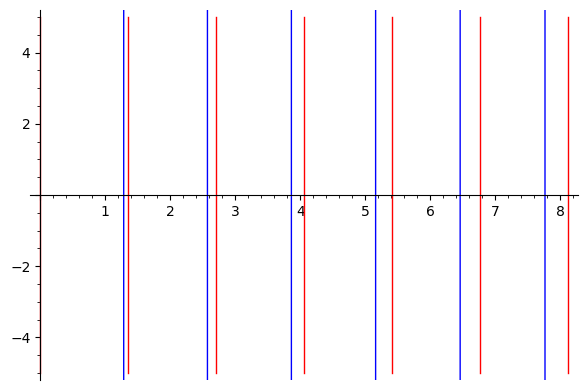

In [288]:
plt = sage.plot.graphics.Graphics()
ylim = 5*10^-5
xeps = lambda_d/1024
plt += plot(disp_eq_b_s.lhs(), xeps, disp_eq_brakes[0])
disp_eq_brakes_plot_range = min(len(disp_eq_brakes), 7)
for i in range(disp_eq_brakes_plot_range-1):
    plt += plot (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps, ymin = -ylim, ymax = ylim)
for i in range(disp_eq_brakes_plot_range):
    plt += line ( [(disp_eq_brakes[i],-ylim), (disp_eq_brakes[i],ylim)], color = 'red')

plt.show()

In [289]:
b_lst = []

xeps = lambda_d/1024
for i in range(len(disp_eq_brakes)-1):
    try:
        #h_lst += [find_root (disp_eq_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)]
        b_lst += find_root_recursive (disp_eq_b_s.lhs(), disp_eq_brakes[i] + xeps, disp_eq_brakes[i+1] - xeps)
    except  Exception as ex:
        print(str(ex))
        print(disp_eq_brakes[i])
        print(disp_eq_brakes [i+1])
b_lst.sort()

In [290]:
b_lst 

[1.28575862024242,
 2.57336304596044,
 3.86432125288227,
 5.15960217137124,
 6.45961560974887,
 7.76432192536664,
 9.07338752534069,
 10.3863248811765,
 11.7025923355126,
 23.6234081378830,
 35.4963794642871,
 36.7998053627271,
 38.0984911438048,
 38.0984911438048,
 38.0984911438048,
 38.0984911438048,
 39.3925069843972,
 40.6824110684154,
 41.9693315593125,
 53.6494728938669,
 64.2361669420616,
 72.1869914193540,
 81.3562208383011,
 81.3562208383011,
 81.3562208383011,
 82.6490141515149,
 83.9379516185262,
 102.197613370296,
 118.088000123665,
 120.711274776520,
 124.613594467816,
 125.905220003587,
 127.193290592916,
 145.463463655200,
 162.663577930282,
 165.276374203027,
 166.575854375606,
 167.870622781936,
 169.161147854365,
 174.307916318725,
 176.895118158273,
 188.729400277480,
 200.660242006392,
 204.613830534612,
 209.833800918769,
 209.833800918769,
 209.833800918769,
 209.833800918769,
 211.127319905634,
 212.416824503647,
 213.703505640565,
 225.386985503506,
 235.9749263

In [291]:
b_lst, h_val

([1.28575862024242,
  2.57336304596044,
  3.86432125288227,
  5.15960217137124,
  6.45961560974887,
  7.76432192536664,
  9.07338752534069,
  10.3863248811765,
  11.7025923355126,
  23.6234081378830,
  35.4963794642871,
  36.7998053627271,
  38.0984911438048,
  38.0984911438048,
  38.0984911438048,
  38.0984911438048,
  39.3925069843972,
  40.6824110684154,
  41.9693315593125,
  53.6494728938669,
  64.2361669420616,
  72.1869914193540,
  81.3562208383011,
  81.3562208383011,
  81.3562208383011,
  82.6490141515149,
  83.9379516185262,
  102.197613370296,
  118.088000123665,
  120.711274776520,
  124.613594467816,
  125.905220003587,
  127.193290592916,
  145.463463655200,
  162.663577930282,
  165.276374203027,
  166.575854375606,
  167.870622781936,
  169.161147854365,
  174.307916318725,
  176.895118158273,
  188.729400277480,
  200.660242006392,
  204.613830534612,
  209.833800918769,
  209.833800918769,
  209.833800918769,
  209.833800918769,
  211.127319905634,
  212.416824503647,


In [292]:
if 1 < n_layers:
    b_sol = b_lst[h_val]
else:
    b_sol = 1

In [293]:
b_sol, h_val

(1.28575862024242, 0)

In [294]:
disp_eq_b_s.subs(b == b_sol)

(-1.24344978758018e-14) == 0

In [295]:
if 1 < n_layers:
    b_sol = find_newton_root(f = disp_eq_b_s.lhs(), x = b, xn = b_sol)

In [296]:
disp_eq_b_s.subs(b == b_sol)

(-1.24344978758018e-14) == 0

In [297]:
h_s = []
for i in range(n_layers):
    h_s += [b_s[i].subs(digit_values).subs(b == b_sol).subs(g_values)]
    
h_s

[h_0 == 1.22147068923030, h_1 == 0.0642879310121211]

In [298]:
h_sol = [0]
if 1 < n_layers:
    for i in range(n_layers):
        h_sol += [h_sol[i] + h_s[i].rhs()]
else:
    h_sol += [b_sol]
h_sol

[0, 1.22147068923030, 1.28575862024242]

In [299]:
E_rho_sol = []
for i in range(n_layers):
    E_rho_sol += [lambda r,p,z, a0, i=i: E_rho_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [300]:
E_phi_sol = []
for i in range(n_layers):
    E_phi_sol += [lambda r,p,z, a0, i=i: (E_phi_s[i](r,p,z) if r != 0 else E_Phi_s[i](r,p,z))
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [301]:
E_z_sol = []
for i in range(n_layers):
    E_z_sol += [lambda r,p,z, a0, i=i: E_z_s[i](r,p,z)
                .subs(digit_values)
                .subs(epsilon_values)
                .subs(g_values)
                .subs(b == b_sol)
                .subs(omega_value)
                .subs(kappa == kappa_d1)
                .subs(c_value)
                .subs(k_values_d)
                .subs(digit_values)
                .subs(amplitude_variable == a0)
               ]

In [302]:
H_rho_sol = []
for i in range(n_layers):
    H_rho_sol += [lambda r,p,z, a0, i=i: (H_rho_s[i](r,p,z) if r != 0 else H_Rho_s[i](r,p,z))
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [303]:
H_phi_sol = []
for i in range(n_layers):
    H_phi_sol += [lambda r,p,z, a0, i=i: H_phi_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [304]:
H_z_sol = []
for i in range(n_layers):
    H_z_sol += [lambda r,p,z, a0, i=i: H_z_s[i](r,p,z)
                  .subs(digit_values)
                  .subs(epsilon_values)
                  .subs(g_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [305]:
if E_mode:
    if 1 < n_layers:
        print([E_z_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])
    else:
        print([E_z_sol [0](rho,ph,z, a0) for rho in [0..int(a_val)]])
    

[0.840369270578830*a0*cos(1.46469191705847*z) - 2.60156652993917*a0*sin(1.46469191705847*z), 0.831952905245027*a0*cos(1.46469191705847*z) - 2.57551163345172*a0*sin(1.46469191705847*z), 0.806956539906073*a0*cos(1.46469191705847*z) - 2.49812933294095*a0*sin(1.46469191705847*z), 0.766129935373583*a0*cos(1.46469191705847*z) - 2.37174069451581*a0*sin(1.46469191705847*z), 0.710694884394625*a0*cos(1.46469191705847*z) - 2.20012807342009*a0*sin(1.46469191705847*z), 0.642304521701698*a0*cos(1.46469191705847*z) - 1.98840914844111*a0*sin(1.46469191705847*z), 0.562988366089503*a0*cos(1.46469191705847*z) - 1.74286678635306*a0*sin(1.46469191705847*z), 0.475085015485400*a0*cos(1.46469191705847*z) - 1.47074068321316*a0*sin(1.46469191705847*z), 0.381164844075462*a0*cos(1.46469191705847*z) - 1.17998805460032*a0*sin(1.46469191705847*z), 0.283945394216314*a0*cos(1.46469191705847*z) - 0.879021710794759*a0*sin(1.46469191705847*z), 0.186202402879276*a0*cos(1.46469191705847*z) - 0.576434617595328*a0*sin(1.4646

In [306]:
if 1 < n_layers:
    print([H_phi_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])
else:
    print([H_phi_sol [0](rho,ph,z, a0) for rho in [0..int(a_val)]])

[0, -0.348115065027609*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -0.685779687973056*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -1.00289200803290*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -1.29003511844793*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -1.53878946204292*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -1.74201034429289*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -1.89406091412278*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -1.99099256405826*pi*(0.840369270578830*I*a0*cos(1.46469191705847*z) - 2.60156652993917*I*a0*sin(1.46469191705847*z)), -2.03066659002870*pi*(0.840369270578830*I*

In [307]:
if not E_mode:
    print([H_z_sol [1](rho,ph,z, a0) for rho in [0..int(a_val)]])

In [308]:
digit_values

[m == 0, a == 12, mu_0 == 1, sigma_0 == 9, mu_1 == 1, sigma_1 == 9]

In [309]:
for i in range(n_layers):
    if E_mode:
        print ((z, h_sol[i], h_sol[i+1]))
        print ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        print ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
        
#plt.show (title="График тангенциальной (rho) компоненты электрического поля E (от высоты цилиндра)")

(z, 0, 1.22147068923030)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 1.21658504596454*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 2.39664811158943*sin(2.44542591410169*z), 3.50488543089457*sin(2.44542591410169*z), 3.50488543089457*sin(2.44542591410169*z), 3.50488543089457*sin(2.44542591410169*z), 3.50488543089457*sin(2.44542591410169*z), 3.50488543089457*sin(2.

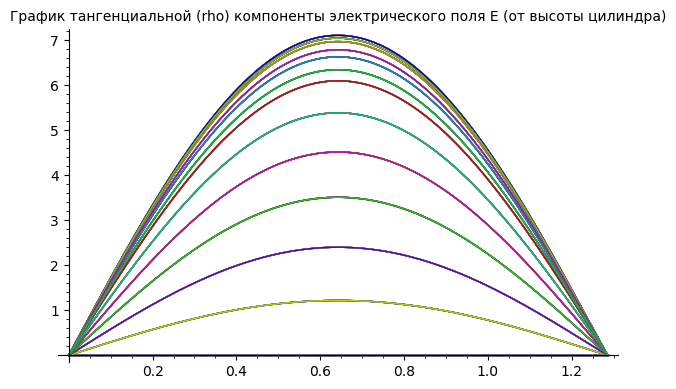

In [310]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
        
plt.show (title="График тангенциальной (rho) компоненты электрического поля E (от высоты цилиндра)")

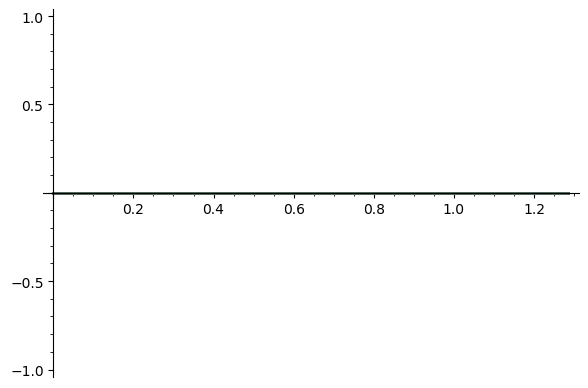

In [311]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([E_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

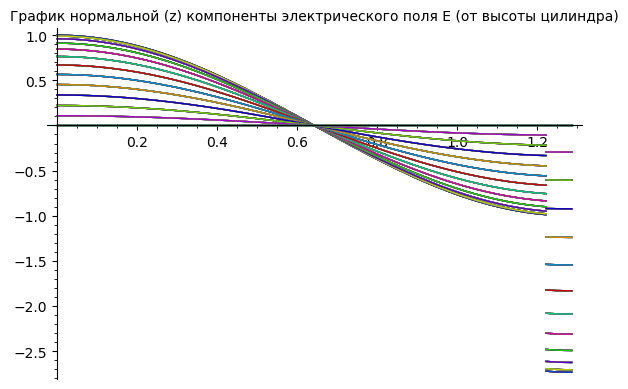

In [312]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))

if E_mode:
    plt.show (title="График нормальной (z) компоненты электрического поля E (от высоты цилиндра)")
else:
    plt.show (title="График нормальной (z) компоненты магнитного поля H (от высоты цилиндра)")

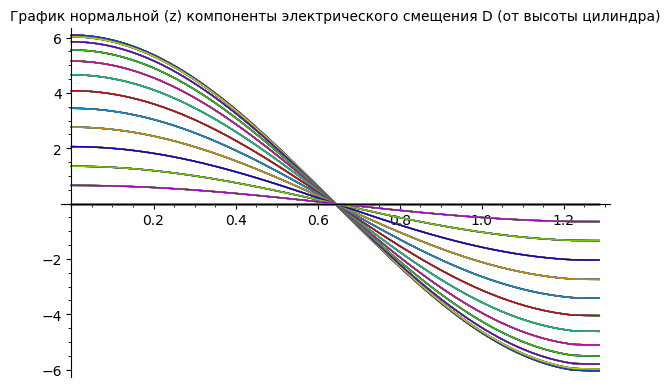

In [313]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([epsilon_d[i]*E_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([mu_d[i]*H_z_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))

if E_mode:
    plt.show (title="График нормальной (z) компоненты электрического смещения D (от высоты цилиндра)")
else:
    plt.show (title="График нормальной (z) компоненты магнитной индукции B (от высоты цилиндра)")

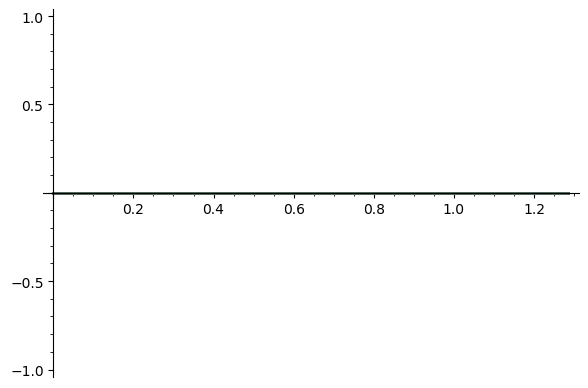

In [314]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_rho_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
        
plt.show ()

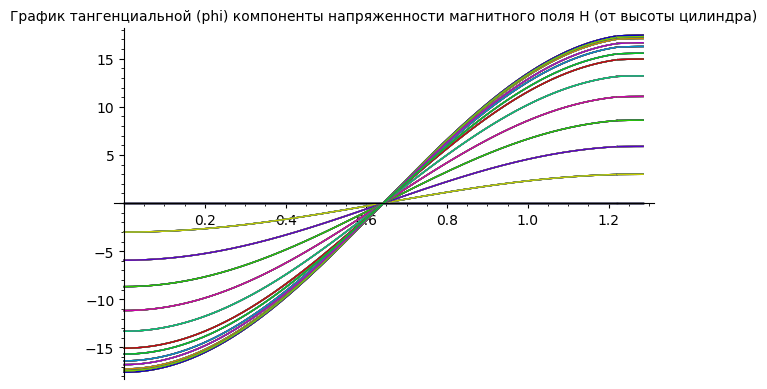

In [315]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi).imag_part() for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))
    else:
        plt += plot ([H_phi_sol[i](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [0..int(a_val)] for phi in phi_arr],(z, h_sol[i], h_sol[i+1]))

plt.show (title="График тангенциальной (phi) компоненты напряженности магнитного поля H (от высоты цилиндра)")

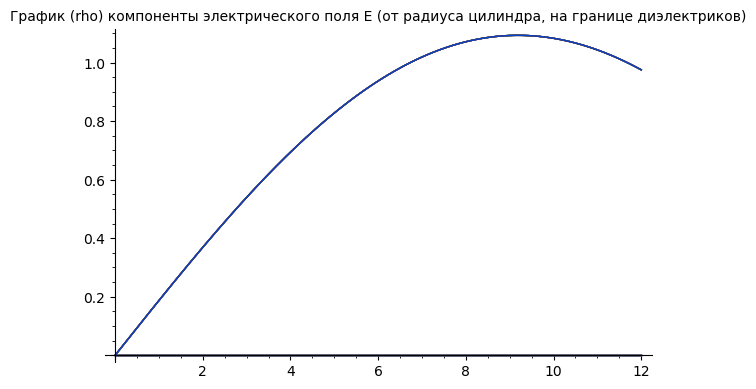

In [316]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_rho_sol[i](rh,ph,h_sol[i],1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
    else:
        plt += plot ([E_rho_sol[i](rh,ph,h_sol[i],1).subs(ph == phi).imag_part() for phi in phi_arr],(rh, 0, a_val))
        
plt.show (title="График (rho) компоненты электрического поля E (от радиуса цилиндра, на границе диэлектриков)")

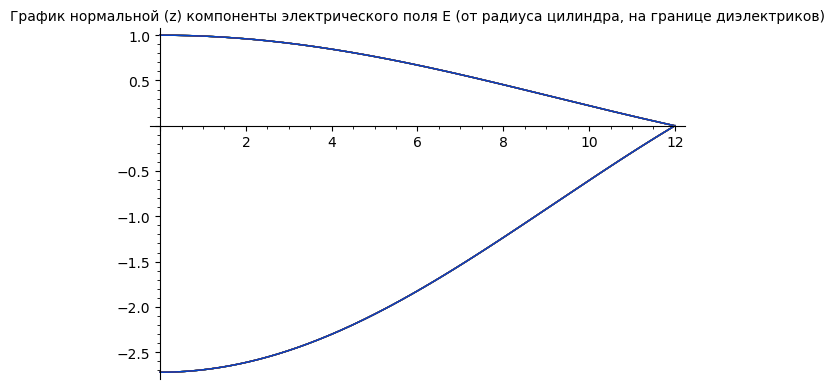

In [317]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    if E_mode:
        plt += plot ([E_z_sol[i](rh,ph,h_sol[i],1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
    else:
        plt += plot ([H_z_sol[i](rh,ph,h_sol[i],1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))

if E_mode:
    plt.show (title="График нормальной (z) компоненты электрического поля E (от радиуса цилиндра, на границе диэлектриков)")
else:
    plt.show (title="График нормальной (z) компоненты магнитного поля H (от радиуса цилиндра, на границе диэлектриков)")

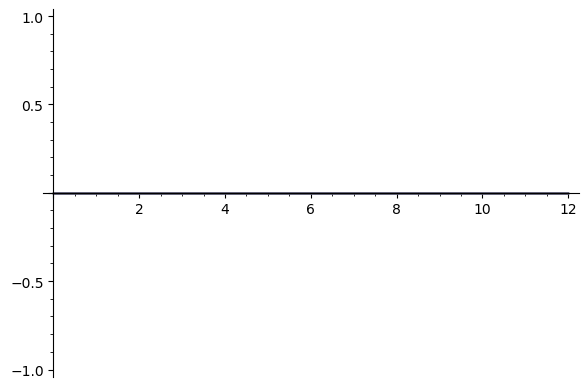

In [318]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in phi_arr],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[0](rh,ph,0,1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
        
plt.show ()

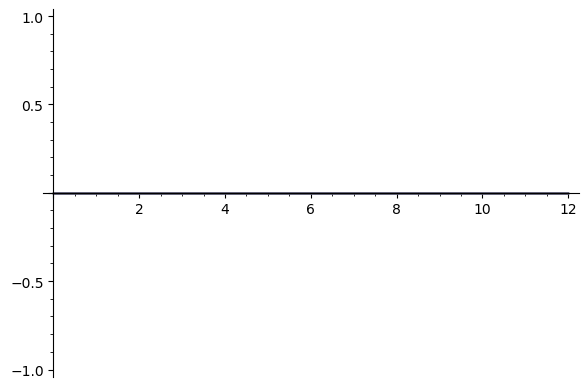

In [319]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in phi_arr],(rh, 0, a_val))
else:
    plt += plot ([H_rho_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
        
plt.show ()

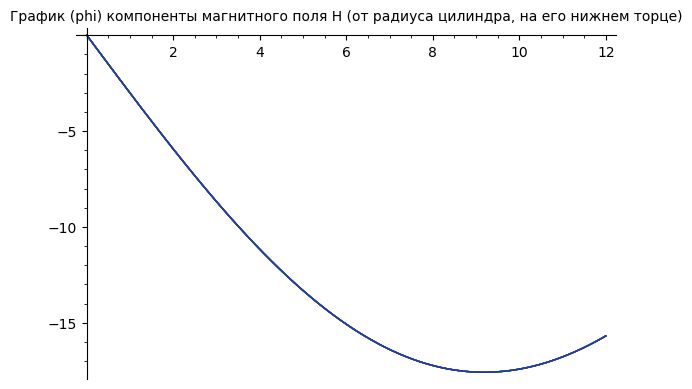

In [320]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() for phi in phi_arr],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
        
plt.show(title="График (phi) компоненты магнитного поля H (от радиуса цилиндра, на его нижнем торце)")

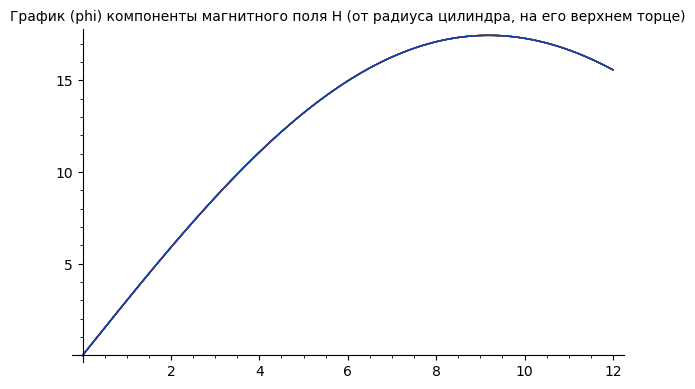

In [321]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in phi_arr],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
        
plt.show(title="График (phi) компоненты магнитного поля H (от радиуса цилиндра, на его верхнем торце)")

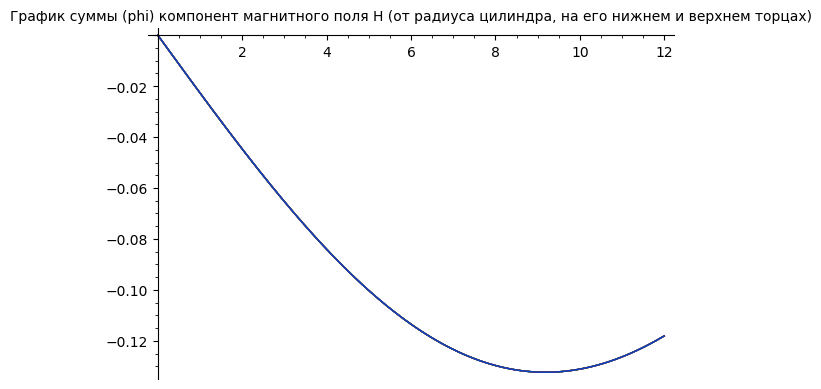

In [322]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi).imag_part() + H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi).imag_part() for phi in phi_arr],(rh, 0, a_val))
else:
    plt += plot ([H_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in phi_arr],(rh, 0, a_val))
        
plt.show(title="График суммы (phi) компонент магнитного поля H (от радиуса цилиндра, на его нижнем и верхнем торцах)")

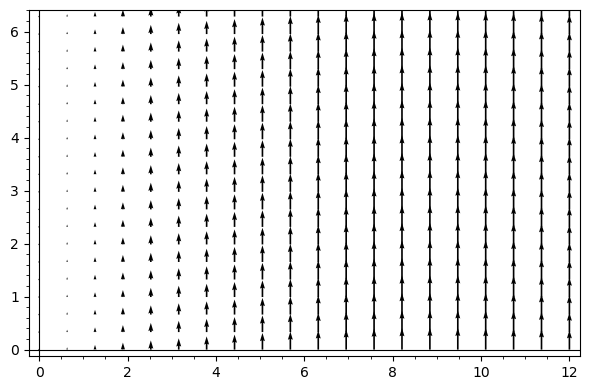

In [323]:
if E_mode:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1).imag_part(),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1).imag_part()),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()
else:
    plot_vector_field((H_rho_sol[n_layers - 1](rh,ph,b_sol,1),
                       H_phi_sol[n_layers - 1](rh,ph,b_sol,1)),
                      (rh, 0, a_val), (ph, 0, 2*pi)).show()

In [324]:
if E_mode:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1).imag_part(),
        name='H1')

    print(H1.display())
    #H1.plot()
else:
    ESpolar.<rho,phi> = EuclideanSpace(coordinates='polar')
    H1 = ESpolar.vector_field(
        H_rho_sol[n_layers - 1](rho,phi,b_sol,1),
        H_phi_sol[n_layers - 1](rho,phi,b_sol,1),
        name='H1')

    print(H1.display())
    #H1.plot()


H1 = (4.77298193903438*pi*real_part(bessel_J(1, 0.200402129807981*rho)) - 4.77298193903438*pi*real_part(bessel_J(-1, 0.200402129807981*rho))) e_phi


In [325]:
def get_integrand_view(f):
    return f(x)

#class my_dummy_integral:
#    f = None
#    a = None
#    b = None
#    def __init__(self, f, a, b):
#        print ("my_dummy_integral ", f, a, b)
#        self.f = f
#        self.a = a
#        self.b = b

def num_int(f, a, b):
    from scipy import integrate
    
    #try:
    #    print ("integrand = ", get_integrand_view(f))
    #except Exception as ex1:
    #    print ("Exception ex1 = ", ex1)
    #print ("a, b = ", a, b)
    
    #to_call_integration = True

    #if type(f) is my_dummy_integral:
    #    to_call_integration = False

    #import inspect
    #stack = inspect.stack()
    #for frame in stack:
    #    func_name = frame[3]
    #    #print ("func_name = ", func_name)
    #    if ('get_integrand_view' == func_name):
    #        to_call_integration = False
    #        break;

    #if not to_call_integration:
    #    return my_dummy_integral(f,a,b)

    try:
        integral = integrate.quad(f, a, b)

        result = integral[0]
        return result

    except Exception as ex:

        print ("Exception ex = ", str(ex))
        print ("f = ", f)
        try:
            print ("integrand = ", get_integrand_view(f))
        except Exception as ex2:
            print ("Exception ex2 = ", ex2)
        print ("a, b = ", a, b)

        import inspect
        stack = inspect.stack()
        for frame in stack:
            func_name = frame[3]
            print ("func_name = ", func_name)
            #if ('get_integrand_view' == func_name):
                #to_call_integration = False
                #break;

        
        raise ex

In [326]:
E2_8pi_rho_sol = []
for i in range(n_layers):
    E2_8pi_rho_sol += [lambda r,p,z, a0, i=i: E2_8pi_rho_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [327]:
E2_8pi_phi_sol = []
for i in range(n_layers):
    E2_8pi_phi_sol += [lambda r,p,z, a0, i=i: (E2_8pi_phi_s[i](r,p,z) if r != 0 else E2_8pi_Phi_s[i](r,p,z))
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [328]:
E2_8pi_z_sol = []
for i in range(n_layers):
    E2_8pi_z_sol += [lambda r,p,z, a0, i=i: E2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [329]:
D2_8pi_z_sol = []
for i in range(n_layers):
    D2_8pi_z_sol += [lambda r,p,z, a0, i=i: D2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [330]:
E2_8pi_rho_sol[0](r,p,z, a0)

1/64*(12.2025944357219*a0*bessel_J(1, 0.200402129807981*r)*sin(2.44542591410169*z) - 12.2025944357219*a0*bessel_J(-1, 0.200402129807981*r)*sin(2.44542591410169*z))^2/pi

In [331]:
E2_8pi_phi_sol[0](r,p,z, a0)

0

In [332]:
E2_8pi_z_sol[0](r,p,z, a0)

1/16*a0^2*bessel_J(0, 0.200402129807981*r)^2*cos(2.44542591410169*z)^2/pi

In [333]:
if E_mode:
    print(E2_8pi_z_sol[0](rh,ph,z, a0))

1/16*a0^2*bessel_J(0, 0.200402129807981*rho)^2*cos(2.44542591410169*z)^2/pi


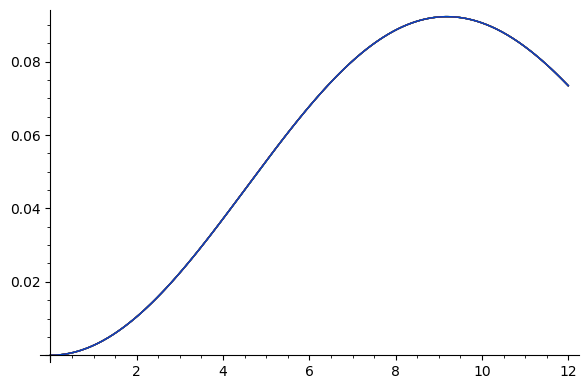

In [334]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon_d[i]-epsilon_d[i+1]) * 
                (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in phi_arr],(rho, 0, a_val))
plt.show ()

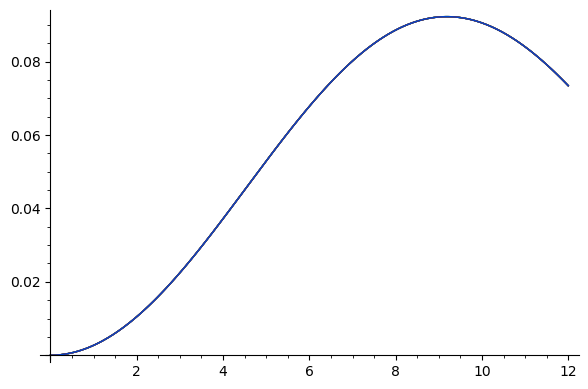

In [335]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi) for phi in phi_arr],(rho, 0, a_val))
plt.show ()

In [336]:
E2_8pi_rho_sol_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_rho_sol[i](r,p,z, a0) * r]

In [337]:
E2_8pi_phi_sol_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_phi_sol[i](r,p,z, a0) * r]

In [338]:
E2_8pi_z_sol_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: E2_8pi_z_sol[i](r,p,z, a0) * r]

In [339]:
D2_8pi_z_sol_rh = []
for i in range(n_layers):
    D2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: D2_8pi_z_sol[i](r,p,z, a0) * r]

In [340]:
E2_8pi_rho_sol_rh[0](rh,ph,z,1)

1/64*(12.2025944357219*bessel_J(1, 0.200402129807981*rho)*sin(2.44542591410169*z) - 12.2025944357219*bessel_J(-1, 0.200402129807981*rho)*sin(2.44542591410169*z))^2*rho/pi

In [341]:
E2_8pi_phi_sol_rh[0](rh,ph,z,1)

0

In [342]:
print(E2_8pi_z_sol_rh[0](rh,ph,z,1))

1/16*rho*bessel_J(0, 0.200402129807981*rho)^2*cos(2.44542591410169*z)^2/pi


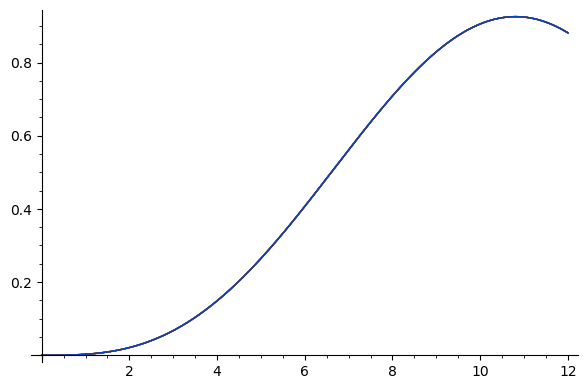

In [343]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers - 1):
    plt += plot ([(epsilon_d[i]-epsilon_d[i+1]) * 
                (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
                 E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
                .subs(rh == rho, ph == phi) for phi in phi_arr],(rho, 0, a_val))
plt.show ()

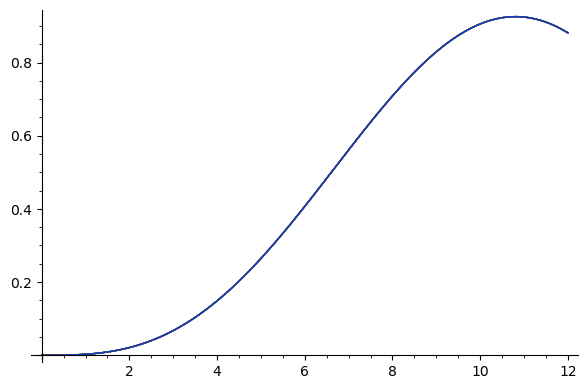

In [344]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]).subs(rh == rho, ph == phi)  for phi in phi_arr],(rho, 0, a_val))
plt.show ()

In [345]:
E2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [346]:
[E2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [347]:
E2_8pi_rho_sol_rh[1](r,p,z, a0)

1/64*(-19.0142363843281*a0*bessel_J(1, 0.200402129807981*r)*cos(1.46469191705847*z) + 19.0142363843281*a0*bessel_J(-1, 0.200402129807981*r)*cos(1.46469191705847*z) - 6.14206086103241*a0*bessel_J(1, 0.200402129807981*r)*sin(1.46469191705847*z) + 6.14206086103241*a0*bessel_J(-1, 0.200402129807981*r)*sin(1.46469191705847*z))^2*r/pi

In [348]:
if 1 < n_layers:
    print([E2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [0..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [349]:
E2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_phi_sol_rh[i](r,p,z, a0),
                                      0, 2*pi)
                                 ]

In [350]:
try:
    E2_8pi_phi_sol_rh[i](0,p,z, a0)
except Exception as ex:
    print (ex)

In [351]:
[E2_8pi_phi_sol_rh_int_ph [0](r,h_sol[1], 1) for r in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [353]:
E2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : E2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [354]:
D2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    D2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : D2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [355]:
if E_mode:
    print([E2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]])

[0.0, 0.1225087677698295, 0.2305154152336637, 0.31167057710130047, 0.3575988029838375, 0.3651082524965359, 0.3366043913819199, 0.27964714616607866, 0.2057241840329592, 0.12843454537859, 0.06136775677932662, 0.01600962011842216, 5.597551949784955e-33]


In [356]:
if E_mode:
    if 1 < n_layers:
        print([E2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [0..int(a_val)]])

[0.0, 0.9156757263238522, 1.7229572553492931, 2.329540874961693, 2.6728253790779366, 2.7289537751267128, 2.515905401493589, 2.090185938047436, 1.5376584473585215, 0.9599671743133544, 0.45868525400036037, 0.11966180704427447, 4.183816832510099e-32]


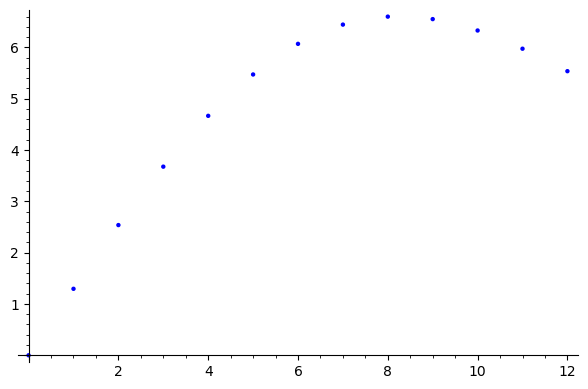

In [357]:
plt = sage.plot.graphics.Graphics()

f_E2_8pi_sol_rh_int_ph_list = [sum([(epsilon_d[i]-epsilon_d[i+1]) *
            (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) +
             E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1))
                                    
             + (epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1]) *
            E2_8pi_z_sol_rh_int_ph[i  ](rho,h_sol[i+1], 1)
                        for i in range(n_layers - 1)])
                               
            for rho in [0..int(a_val)] ]

plt += list_plot (f_E2_8pi_sol_rh_int_ph_list)
plt.show ()

In [358]:
print(f_E2_8pi_sol_rh_int_ph_list)

[0.000000000000000, 1.29531417536751, 2.53734345647615, 3.67574150704977, 4.66596969842644, 5.47200238891554, 6.06873144827846, 6.44388708840694, 6.59925920999835, 6.55100003837645, 6.32882661553072, 5.97402507288296, 5.53628260635564]


In [359]:
E2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [360]:
E2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [361]:
E2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : E2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [362]:
D2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    D2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : D2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [363]:
# Static and dynamic electricity by William R. Smythe, second edition, 1950
# paragraph 18 formula 1.47

p_dielectric_surf_rho = []
for i in range(n_layers - 1):
    p_dielectric_surf_rho += [(epsilon_d[i]-epsilon_d[i+1])*E2_8pi_rho_sol_rh_int_ph_int_rh[i  ](0, a_val, h_sol[i+1], 1)]
    #f_dielectric_surf_rho += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_rho_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [364]:
p_dielectric_surf_phi = []
for i in range(n_layers - 1):
    p_dielectric_surf_phi += [(epsilon_d[i]-epsilon_d[i+1])*E2_8pi_phi_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_phi += [(epsilon[i]-epsilon[i+1]).subs(digit_values)*E2_8pi_phi_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]

In [365]:
# Static and dynamic electricity by William R. Smythe, second edition, 1950
# paragraph 18 formula 1.45

#f_dielectric_surf_z = []
t_dielectric_surf_z = []
for i in range(n_layers - 1):
    epsilon_d[i]*E_z_sol[i](rh,ph,z,1)
    #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1])*E2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]
    #f_dielectric_surf_z += [(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i+1]/epsilon_d[i])*E2_8pi_z_sol_rh_int_ph_int_rh[i+1](0, a_val,  h_sol[i+1], 1)]
    
    t_dielectric_surf_z += [(1/epsilon_d[i]-1/epsilon_d[i+1])*D2_8pi_z_sol_rh_int_ph_int_rh[i  ](0, a_val,  h_sol[i+1], 1)]

In [366]:
# Static and dynamic electricity by William R. Smythe, second edition, 1950
# paragraph 18 formula 1.45

# The tension produced by normal components of E (beetween metal and dielectric).
# assuming epsilon for metals =Infinity
# Does it really exists?

t_metal_dielectric_z = (0.0                     - 1/epsilon_d[0]) * D2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol[0],1)
t_dielectric_metal_z = (1/epsilon_d[n_layers-1] - 0.0           ) * D2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol,1)

In [367]:
if E_mode:
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1))
    print(E2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, h_sol[1], 1))

2.4256271154772517
2.368129524167362


In [368]:
if E_mode:
    if 1 < n_layers:
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[1], 1))
        print(E2_8pi_z_sol_rh_int_ph_int_rh[1](0, a_val, h_sol[2], 1))

17.96975680818583
18.130031924967703


In [369]:
E2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [370]:
E2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [371]:
E2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    E2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : E2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [372]:
H2_8pi_rho_sol = []
for i in range(n_layers):
    H2_8pi_rho_sol += [lambda r,p,z, a0, i=i: (H2_8pi_rho_s[i](r,p,z) if r != 0 else H2_8pi_Rho_s[i](r,p,z))
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [373]:
H2_8pi_phi_sol = []
for i in range(n_layers):
    H2_8pi_phi_sol += [lambda r,p,z, a0, i=i: H2_8pi_phi_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [374]:
H2_8pi_z_sol = []
for i in range(n_layers):
    H2_8pi_z_sol += [lambda r,p,z, a0, i=i: H2_8pi_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [375]:
H2_8pi_rho_sol[0](rh,ph,z, a0)

0

In [376]:
H2_8pi_phi_sol[0](rh,ph,z, a0)

1/64*(9.61835706213919*pi*a0*bessel_J(1, 0.200402129807981*rho)*cos(2.44542591410169*z) - 9.61835706213919*pi*a0*bessel_J(-1, 0.200402129807981*rho)*cos(2.44542591410169*z))^2/pi

In [377]:
H2_8pi_z_sol[0](rh,ph,z, a0)

0

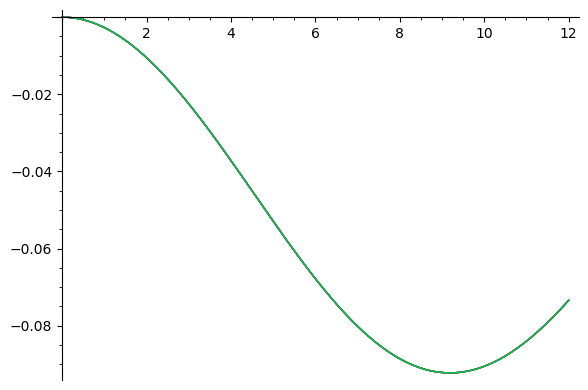

In [378]:
plt = sage.plot.graphics.Graphics()

if E_mode:
    plt += plot ([- H2_8pi_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
else:
    plt += plot ([- H2_8pi_phi_sol[0](rh,ph,0,1).subs(ph == phi) + H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1).subs(ph == phi) for phi in [0 .. 2*pi]],(rh, 0, a_val))
        
plt.show ()

The force produced by tangential components of H (beetween metal and dielectric)

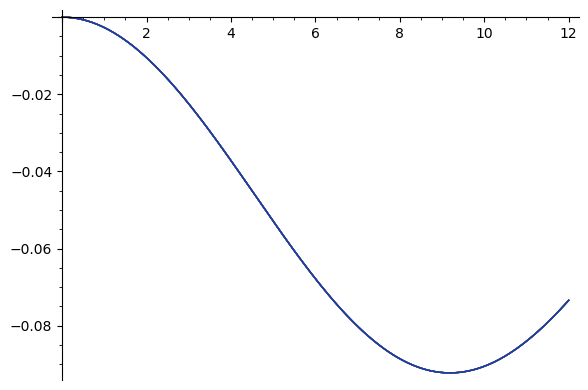

In [379]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) ))

            for ph in phi_arr],(rh, 0, a_val))
plt.show ()

The pressure produced by tangential components of E (beetween dielectrics)

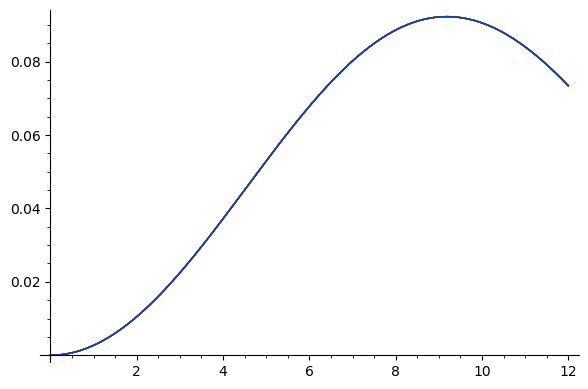

In [380]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([(epsilon_d[i]-epsilon_d[i+1]) *    #
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) +  # p_dielectric_surf_rho
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )  # p_dielectric_surf_phi

            for i in range(n_layers - 1)]) for ph in phi_arr],(rh, 0, a_val))
plt.show ()

The pressures produced by tangential components of H (between metal and dielectric) and E (between dielectrics) seems like compensate each other

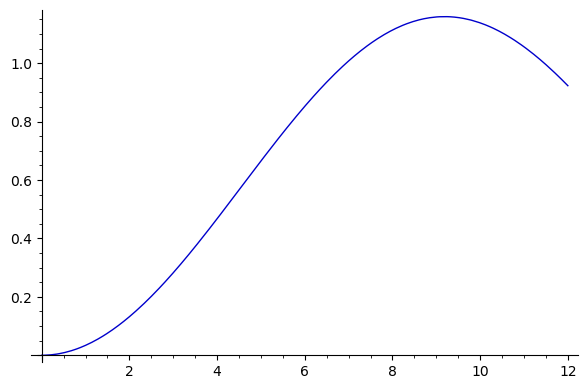

In [381]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))
            for ph in [0]],(rh, 0, a_val))
plt.show ()

In [382]:
[
    ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
     H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
     H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
    -
    (H2_8pi_rho_sol[0](rh,ph,0,1) + 
     H2_8pi_phi_sol[0](rh,ph,0,1) +
     H2_8pi_z_sol  [0](rh,ph,0,1) )
    +
    sum([(epsilon_d[i]-epsilon_d[i+1]) * 
    (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
     E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )
    for i in range(n_layers - 1)])).n()

    for ph in [0] for rh in [0..a_val]]

[0.000000000000000,
 3.40458311679122e-7,
 1.32125772650191e-6,
 2.82570386493999e-6,
 4.67542797502607e-6,
 6.65237482935788e-6,
 8.52549813729064e-6,
 0.0000100787387680018,
 0.0000111367271805884,
 0.0000115849870285512,
 0.0000113821731277525,
 0.0000105629482951980,
 9.23134277902582e-6]

The pressure produced by tangential components of E (beetween metal and dielectric). Does it really exists?

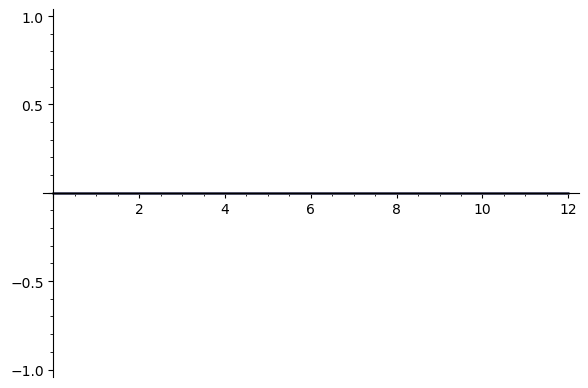

In [383]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(1.0-epsilon_d[0]) * 
            (E2_8pi_rho_sol[0](rh,ph,h_sol[0],1) + 
             E2_8pi_phi_sol[0](rh,ph,h_sol[0],1)
            ) for ph in phi_arr],(rh, 0, a_val))

plt += plot ([(epsilon_d[n_layers - 1] - 1.0) * 
            (E2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             E2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1)
            ) for ph in phi_arr],(rh, 0, a_val))
plt.show ()

The tension produced by normal components of E (beetween metal and dielectric).

Static and dynamic electricity by William R. Smythe, second edition, 1950
paragraph 18 formula 1.45

assuming epsilon for metalls = Infinity

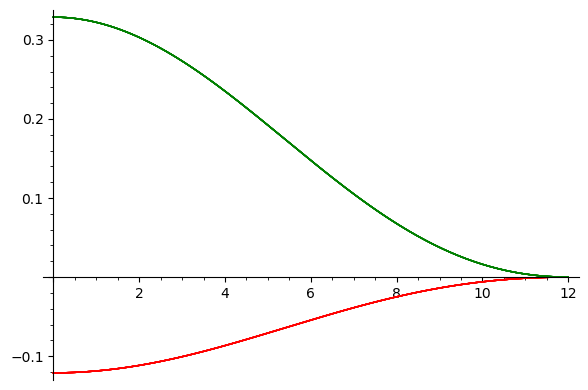

In [384]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(0.0-1/epsilon_d[0]) * D2_8pi_z_sol[0](rh,ph,h_sol[0],1)
              for ph in phi_arr],(rh, 0, a_val), color="red")
plt += plot ([(1/epsilon_d[n_layers-1]-0.0) * D2_8pi_z_sol[n_layers-1](rh,ph,b_sol,1)
              for ph in phi_arr],(rh, 0, a_val), color = "green")
plt.show ()

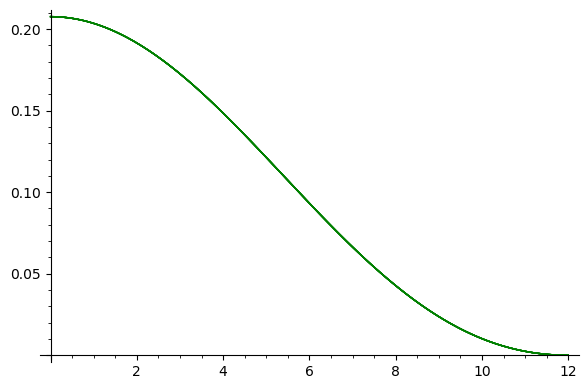

In [385]:
plt = sage.plot.graphics.Graphics()

plt += plot ([(+(0.0-1/epsilon_d[0]) * D2_8pi_z_sol[0](rh,ph,h_sol[0],1)
               +(1/epsilon_d[n_layers-1]-0.0) * D2_8pi_z_sol[n_layers-1](rh,ph,b_sol,1))
              for ph in phi_arr],(rh, 0, a_val), color = "green")
plt.show ()

The tension produced by normal component of E (beetween dielectrics)

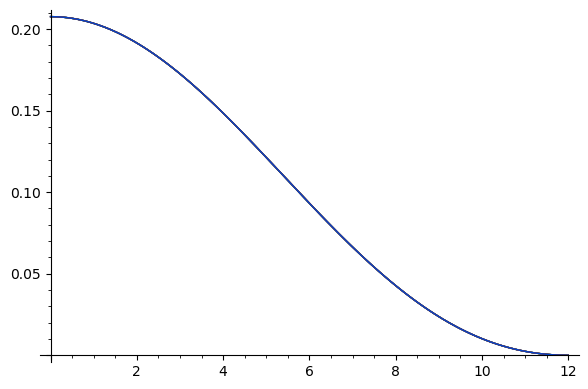

In [386]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([
            # f_dielectric_surf_z                   
            # Static and dynamic electricity by William R. Smythe, second edition, 1950
            # paragraph 18 formula 1.45
            (epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1]) *
             E2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)

            for i in range(n_layers - 1)]) for ph in phi_arr],(rh, 0, a_val))
plt.show ()

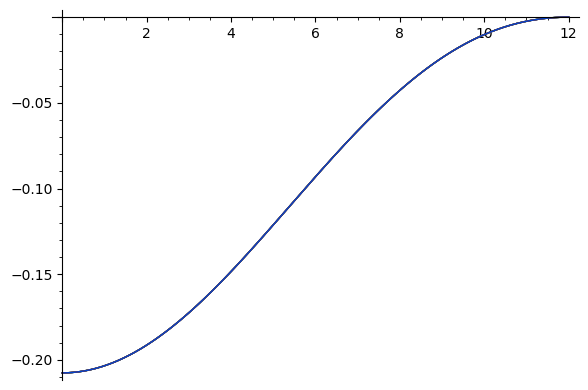

In [387]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([
            # f_dielectric_surf_z                   
            # Static and dynamic electricity by William R. Smythe, second edition, 1950
            # paragraph 18 formula 1.45
            (1/epsilon_d[i]-1/epsilon_d[i+1]) * D2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)

            for i in range(n_layers - 1)]) for ph in phi_arr],(rh, 0, a_val))
plt.show ()

In [388]:
[sum([
    # f_dielectric_surf_z                   
    +  # Static and dynamic electricity by William R. Smythe, second edition, 1950
       # paragraph 18 formula 1.45
    (epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1]) *
     E2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)

    for i in range(n_layers - 1)]) for ph in [0] for rh in [0..a_val]]

[0.652146698051107/pi,
 0.639149507067234/pi,
 0.601319467578055/pi,
 0.542013167296790/pi,
 0.466413757185876/pi,
 0.380966626074921/pi,
 0.292687256518962/pi,
 0.208423957704713/pi,
 0.134162347326353/pi,
 0.0744517019416378/pi,
 0.0320166239603530/pi,
 0.00759317883438661/pi,
 (2.43361668081453e-33)/pi]

The tension produced by normal components of E (beetween metal and dielectric) + The tension produced by normal component of E (beetween dielectrics)

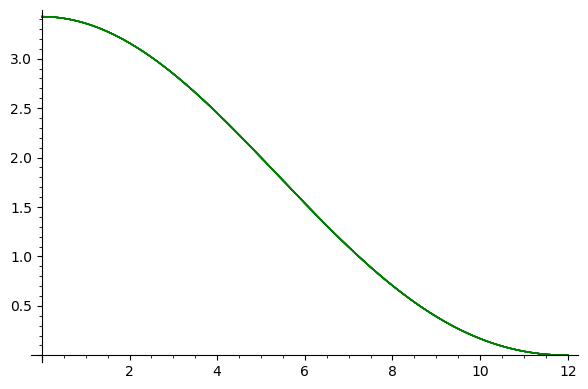

In [389]:
plt = sage.plot.graphics.Graphics()

plt += plot ([( + (0.0-1/epsilon_d[0]) * D2_8pi_z_sol[0](rh,ph,h_sol[0],1)
                + (1/epsilon_d[n_layers-1]-0.0) * D2_8pi_z_sol[n_layers-1](rh,ph,b_sol,1)
                + sum([
                # f_dielectric_surf_z                   
                # Static and dynamic electricity by William R. Smythe, second edition, 1950
                # paragraph 18 formula 1.45
                + (1/epsilon_d[i]-1/epsilon_d[i+1]) * D2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)
                for i in range(n_layers - 1)])
                )

              for ph in phi_arr],(rh, 0, a_val), color = "green")
plt.show ()

In [390]:
[( + (0.0-1/epsilon_d[0]) * D2_8pi_z_sol[0](rh,ph,h_sol[0],1)
                + (1/epsilon_d[n_layers-1]-0.0) * D2_8pi_z_sol[n_layers-1](rh,ph,b_sol,1)
                + sum([
                # f_dielectric_surf_z                   
                # Static and dynamic electricity by William R. Smythe, second edition, 1950
                # paragraph 18 formula 1.45
                + (1/epsilon_d[i]-1/epsilon_d[i+1]) * D2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)
                for i in range(n_layers - 1)])).n()
              for ph in [0] for rh in [0..a_val]]

[0.0000342517959668195,
 0.0000335691625424459,
 0.0000315822678792407,
 0.0000284674053753008,
 0.0000244968024755649,
 0.0000200089813925236,
 0.0000153724065802274,
 0.0000109467622779458,
 7.04642277694784e-6,
 3.91032341636905e-6,
 1.68156470731975e-6,
 3.98805994038958e-7,
 1.27817471531958e-37]

The force produced by tangential and normal components of E (beetween dielectrics) 

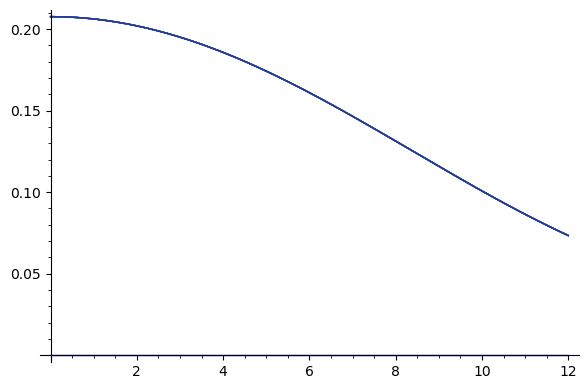

In [391]:
plt = sage.plot.graphics.Graphics()

plt += plot ([sum([
            # Static and dynamic electricity by William R. Smythe, second edition, 1950
            # paragraph 18 formula 1.47
            (epsilon_d[i]-epsilon_d[i+1]) *    #
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1)  # f_dielectric_surf_rho
             +(E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1)) )  # f_dielectric_surf_phi
                                                      # f_dielectric_surf_z                   
            # Static and dynamic electricity by William R. Smythe, second edition, 1950
            # paragraph 18 formula 1.45
            +(epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1]) *
             E2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)

            for i in range(n_layers - 1)]) for ph in phi_arr],(rh, 0, a_val))
plt += plot(0, (rh, 0, a_val))
plt.show ()

In [392]:
[(rh, sum([
    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.47
    (epsilon_d[i]-epsilon_d[i+1]) *    #
    (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1)   # f_dielectric_surf_rho
    +(E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) if 0 == rh else E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) ))  # f_dielectric_surf_phi
                                              # f_dielectric_surf_z                   
    +  # Static and dynamic electricity by William R. Smythe, second edition, 1950
       # paragraph 18 formula 1.45
    (epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1]) *
     E2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)

    for i in range(n_layers - 1)])) for ph in [0] for rh in [0.. a_val]]

[(0, 0.652146698051107/pi),
 (1, 0.647657087683753/pi),
 (2, 0.634335864119037/pi),
 (3, 0.612623584508295/pi),
 (4, 0.583246212303304/pi),
 (5, 0.547200238891554/pi),
 (6, 0.505727620689872/pi),
 (7, 0.460277649171924/pi),
 (8, 0.412453700624897/pi),
 (9, 0.363944446576469/pi),
 (10, 0.316441330776536/pi),
 (11, 0.271546594221953/pi),
 (12, 0.230678441931485/pi)]

In [393]:
[(rh, sum([
    # Static and dynamic electricity by William R. Smythe, second edition, 1950
    # paragraph 18 formula 1.47
    (epsilon_d[i]-epsilon_d[i+1]) *    #
    (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1)  # f_dielectric_surf_rho
    +(E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) if 0 == rh else E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1)) )  # f_dielectric_surf_phi

    for i in range(n_layers - 1)])) for ph in [0] for rh in [0.. a_val]]

[(0, 0),
 (1, 0.00850758061651894/pi),
 (2, 0.0330163965409827/pi),
 (3, 0.0706104172115057/pi),
 (4, 0.116832455117428/pi),
 (5, 0.166233612816633/pi),
 (6, 0.213040364170910/pi),
 (7, 0.251853691467212/pi),
 (8, 0.278291353298544/pi),
 (9, 0.289492744634832/pi),
 (10, 0.284424706816183/pi),
 (11, 0.263953415387566/pi),
 (12, 0.230678441931485/pi)]

The summaric force produced
by tangential components of H (beetween metal and dielectric)
and
by tangential and normal components of E (beetween dielectrics) 

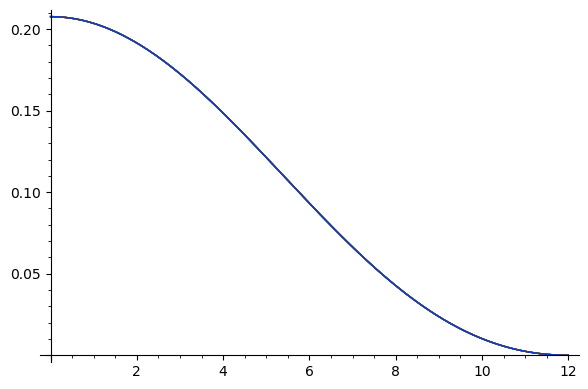

In [394]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol[0](rh,ph,0,1) + 
             H2_8pi_phi_sol[0](rh,ph,0,1) +
             H2_8pi_z_sol  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol[i](rh,ph,h_sol[i+1],1) )

            # f_dielectric_surf_z                   
            +  # Static and dynamic electricity by William R. Smythe, second edition, 1950
               # paragraph 18 formula 1.45
            (epsilon_d[i]-epsilon_d[i+1])*(epsilon_d[i]/epsilon_d[i+1]) *
             E2_8pi_z_sol  [i](rh,ph,h_sol[i+1], 1)

            for i in range(n_layers - 1)]))

            for ph in phi_arr],(rh, 0, a_val))
plt.show ()

In [395]:
H2_8pi_rho_sol_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_rho_sol[i](r,p,z, a0) * r]

In [396]:
H2_8pi_phi_sol_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_phi_sol[i](r,p,z, a0) * r]

In [397]:
H2_8pi_z_sol_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh += [lambda r,p,z, a0, i=i: H2_8pi_z_sol[i](r,p,z, a0) * r]

In [398]:
H2_8pi_rho_sol_rh[0](rh,ph,z,1)

0

In [399]:
H2_8pi_phi_sol_rh[0](rh,ph,z,1)

1/64*(9.61835706213919*pi*bessel_J(1, 0.200402129807981*rho)*cos(2.44542591410169*z) - 9.61835706213919*pi*bessel_J(-1, 0.200402129807981*rho)*cos(2.44542591410169*z))^2*rho/pi

In [400]:
H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,z,1)

1/64*(2.93428764517437*pi*bessel_J(1, 0.200402129807981*rho)*cos(1.46469191705847*z) - 2.93428764517437*pi*bessel_J(-1, 0.200402129807981*rho)*cos(1.46469191705847*z) - 9.08379779479765*pi*bessel_J(1, 0.200402129807981*rho)*sin(1.46469191705847*z) + 9.08379779479765*pi*bessel_J(-1, 0.200402129807981*rho)*sin(1.46469191705847*z))^2*rho/pi

In [401]:
H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,0,1) - H2_8pi_phi_sol_rh[0](rh,ph,b_sol,1)

1/64*(2.93428764517437*pi*bessel_J(1, 0.200402129807981*rho) - 2.93428764517437*pi*bessel_J(-1, 0.200402129807981*rho))^2*rho/pi - 1/64*(-9.61832367612931*pi*bessel_J(1, 0.200402129807981*rho) + 9.61832367612931*pi*bessel_J(-1, 0.200402129807981*rho))^2*rho/pi

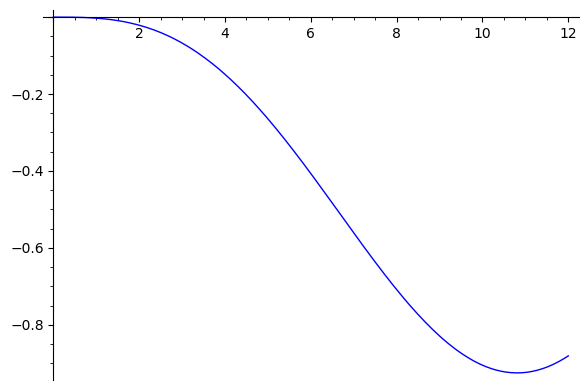

In [402]:
plot(H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) - H2_8pi_phi_sol_rh[0](rh,ph,0,1),(rh,0,a_val))

In [403]:
H2_8pi_z_sol_rh[0](rh,ph,z,1)

0

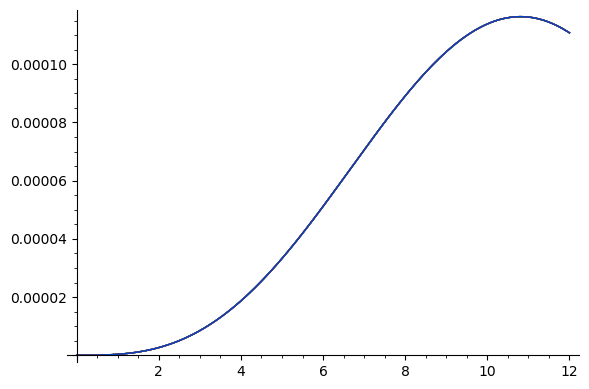

In [404]:
plt = sage.plot.graphics.Graphics()

plt += plot ([
            ((H2_8pi_rho_sol_rh[n_layers - 1](rh,ph,b_sol,1) + 
             H2_8pi_phi_sol_rh[n_layers - 1](rh,ph,b_sol,1) +
             H2_8pi_z_sol_rh  [n_layers - 1](rh,ph,b_sol,1) )
            -
            (H2_8pi_rho_sol_rh[0](rh,ph,0,1) + 
             H2_8pi_phi_sol_rh[0](rh,ph,0,1) +
             H2_8pi_z_sol_rh  [0](rh,ph,0,1) )
            +
            sum([(epsilon_d[i]-epsilon_d[i+1]) * 
            (E2_8pi_rho_sol_rh[i](rh,ph,h_sol[i+1],1) + 
             E2_8pi_phi_sol_rh[i](rh,ph,h_sol[i+1],1) )
            for i in range(n_layers - 1)]))

            for ph in phi_arr],(rh, 0, a_val))
plt.show ()

In [405]:
H2_8pi_rho_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_rho_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [406]:
[H2_8pi_rho_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [407]:
if 1 < n_layers:
    print([H2_8pi_rho_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [0..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [408]:
H2_8pi_phi_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_phi_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [409]:
[H2_8pi_phi_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0,
 1.1344677177914324,
 8.805332026079943,
 28.24724530168996,
 62.31743415451602,
 110.83448741357586,
 170.45086726711682,
 235.0890656445459,
 296.87646412158875,
 347.42915678851574,
 379.274276165813,
 387.17387055282717,
 369.1257348349748]

In [410]:
if 1 < n_layers:
    print([H2_8pi_phi_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [0..int(a_val)]])

[0.0, 1.1174546957210563, 8.67328304333028, 27.823636061683946, 61.38289201989803, 109.17236027592845, 167.89470430077367, 231.56355725008837, 292.42436226177676, 342.2189425006713, 373.5864971925189, 381.3676254728776, 363.59014825546694]


In [411]:
H2_8pi_z_sol_rh_int_ph = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph += [lambda r, z, a0, i=i: 
                                  num_int(
                                      lambda p : H2_8pi_z_sol_rh[i](r,p,z, a0), 
                                      0, 2*pi)
                                 ]

In [412]:
[H2_8pi_z_sol_rh_int_ph [0](rho,0, 1) for rho in [0..int(a_val)]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [413]:
if 1 < n_layers:
    print([H2_8pi_z_sol_rh_int_ph [1](rho,h_sol[2], 1) for rho in [0..int(a_val)]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


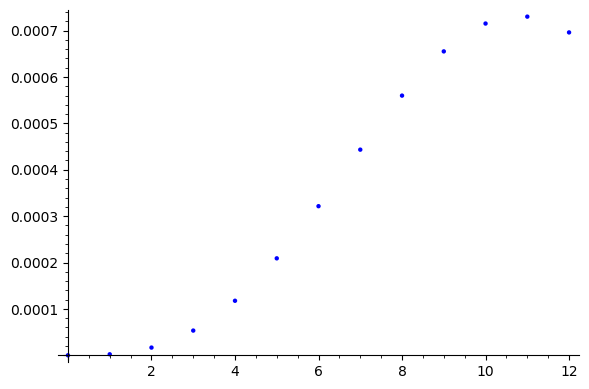

In [414]:
plt = sage.plot.graphics.Graphics()

plt += list_plot ([
    ((H2_8pi_rho_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) + 
     H2_8pi_phi_sol_rh_int_ph[n_layers - 1](rho,b_sol,1) +
     H2_8pi_z_sol_rh_int_ph  [n_layers - 1](rho,b_sol,1) )
    -
    (H2_8pi_rho_sol_rh_int_ph[0](rho,0,1) + 
     H2_8pi_phi_sol_rh_int_ph[0](rho,0,1) +
     H2_8pi_z_sol_rh_int_ph  [0](rho,0,1) )
    +
    sum([(epsilon_d[i]-epsilon_d[i+1]) * 
    (E2_8pi_rho_sol_rh_int_ph[i](rho,h_sol[i+1],1) + 
     E2_8pi_phi_sol_rh_int_ph[i](rho,h_sol[i+1],1) ) for i in range(n_layers - 1)]))
    for rho in [0..int(a_val)] ])
plt.show ()

In [415]:
H2_8pi_rho_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_rho_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [416]:
H2_8pi_phi_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_phi_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [417]:
H2_8pi_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : H2_8pi_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [418]:
f_surf_0_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_rho

0.0

In [419]:
f_surf_0_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_phi

2214.75440900985

In [420]:
f_surf_0_z   = H2_8pi_z_sol_rh_int_ph_int_rh[0](0, a_val, 0, 1)
f_surf_0_z

0.0

In [421]:
f_surf_1_rho = H2_8pi_rho_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_rho

0.0

In [422]:
f_surf_1_phi = H2_8pi_phi_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_phi

2181.540889532802

In [423]:
f_surf_1_z   = H2_8pi_z_sol_rh_int_ph_int_rh[n_layers - 1](0, a_val, b_sol, 1)
f_surf_1_z

0.0

In [424]:
surf_f_z = - (f_surf_0_rho + f_surf_0_phi + f_surf_0_z) + (f_surf_1_rho + f_surf_1_phi + f_surf_1_z)

In [425]:
surf_f_z

-33.21351947704807

In [426]:
p_dielectric_surf_rho

[33.2176956381338]

In [427]:
p_dielectric_surf_phi

[0.000000000000000]

In [428]:
t_dielectric_surf_z

[-25.3098354249875]

In [429]:
t_metal_dielectric_z

-14.7745529754227

In [430]:
t_dielectric_metal_z

40.0885645614989

The pressure produced by tangential components of E (between dielectrics)

In [431]:
p_dielectric_surf = 0
for i in range(n_layers - 1):
    p_dielectric_surf += p_dielectric_surf_rho[i] + p_dielectric_surf_phi[i]
    
print(p_dielectric_surf)

33.2176956381338


The pressures produced by tangential components of H (between metal and dielectric) and E (between dielectrics) seems like compensate each other

In [432]:
sum_surf_f_z = surf_f_z + p_dielectric_surf
print(sum_surf_f_z)

0.00417616108578045


In [433]:
sum_t_dielectric_surf_z = 0
for i in range(n_layers - 1):
    sum_t_dielectric_surf_z += t_dielectric_surf_z[i]
    
print(sum_t_dielectric_surf_z)

-25.3098354249875


In [434]:
sum_surf_f_z = surf_f_z + sum_t_dielectric_surf_z

In [435]:
sum_surf_f_z

-58.5233549020356

In [436]:
H2_8pi_rho_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_rho_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_rho_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [437]:
H2_8pi_phi_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_phi_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_phi_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [438]:
H2_8pi_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    H2_8pi_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : H2_8pi_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [439]:
ED_8pi_rho = []
for i in range(n_layers):
    ED_8pi_rho += [epsilon_d[i] * E2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i], h_sol[i+1], 1)]

In [440]:
#ED_8pi_rho_0 + ED_8pi_rho_1
sum(ED_8pi_rho)

1412.44022518833

In [441]:
ED_8pi_phi = []
for i in range(n_layers):
    ED_8pi_phi += [epsilon_d[i] * E2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [442]:
#ED_8pi_phi_0 + ED_8pi_phi_1
sum(ED_8pi_phi)

0.000000000000000

In [443]:
ED_8pi_z = []
for i in range(n_layers):
    ED_8pi_z += [epsilon_d[i] * E2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [444]:
#ED_8pi_z_0 + ED_8pi_z_1
sum(ED_8pi_z)

11.1333985174175

In [445]:
HB_8pi_rho = []
for i in range(n_layers):
    HB_8pi_rho += [mu_d[i] * H2_8pi_rho_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [446]:
#H2_8pi_rho_0 + H2_8pi_rho_1
sum(HB_8pi_rho)

0.0

In [447]:
HB_8pi_phi = []
for i in range(n_layers):
    HB_8pi_phi += [mu_d[i] * H2_8pi_phi_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [448]:
#H2_8pi_phi_0 + H2_8pi_phi_1
sum(HB_8pi_phi)

1423.573623705743

In [449]:
HB_8pi_z = []
for i in range(n_layers):
    HB_8pi_z += [mu_d[i] * H2_8pi_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [450]:
#H2_8pi_z_0 + H2_8pi_z_1
sum(HB_8pi_z)

0.0

In [451]:
field_energy = sum(HB_8pi_rho) + sum(HB_8pi_phi) + sum(HB_8pi_z) \
             + sum(ED_8pi_rho) + sum(ED_8pi_phi) + sum(ED_8pi_z)
field_energy

2847.14724741149

In [452]:
# E x H = (-E_z(rh, ph, z)*H_phi(rh, ph, z) + E_phi(rh, ph, z)*H_z(rh, ph, z)) e_rh 
#       + ( E_z(rh, ph, z)*H_rho(rh, ph, z) - E_rho(rh, ph, z)*H_z(rh, ph, z)) e_ph
#       + (E_rho(rh, ph, z)*H_phi(rh, ph, z) - E_phi(rh, ph, z)*H_rho(rh, ph, z)) e_z

In [453]:
# Abraham force
# Minkovsky form without dissipation
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re(E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re(E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * E_rh) * Re(H_ph) + Im(-I*omega * E_rh) * Im(H_ph) 
#        - Re(-I*omega * E_ph) * Re(H_rh) - Im(-I*omega * E_ph) * Im(H_rh)) +
#         (Re(E_rh) * Re(-I*omega * H_ph) + Im(E_rh) * Im(-I*omega * H_ph)
#        - Re(E_ph) * Re(-I*omega * H_rh) - Im(E_ph) * Im(-I*omega * H_rh)) 
#       )


In [454]:
Abraham_Minkovsky_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z += [lambda r,p,z,  i=i: " + str(
         (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re(E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im(E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re(E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im(E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [455]:
print(Abraham_Minkovsky_f_z[0](rh, ph, z))

1/32*(8*D_z_0^2*epsilon_0*k_0*m^2*omega^2*bessel_J(m, kappa*rho)^2*cos(k_0*z)*sin(m*varphi)^2*sin(k_0*z)/(c*kappa^4*rho^2) + (D_z_0*k_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*sin(k_0*z)/kappa - D_z_0*k_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*sin(k_0*z)/kappa)*(D_z_0*epsilon_0*omega*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa)) - (D_z_0*epsilon_0*omega^2*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa) - D_z_0*epsilon_0*omega^2*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*cos(k_0*z)/(c*kappa))*(D_z_0*k_0*bessel_J(m + 1, kappa*rho)*cos(m*varphi)*sin(k_0*z)/kappa - D_z_0*k_0*bessel_J(m - 1, kappa*rho)*cos(m*varphi)*sin(k_0*z)/kappa))*(epsilon_0*mu_0 - 1)/(pi*c)


In [456]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [457]:
display(Math(latex(Abraham_Minkovsky_f_z[0](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [458]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [459]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z[1](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [460]:
Abraham_Minkovsky_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_Minkovsky_f_z_s += [lambda r,p,z,  i=i: " + str(
        (epsilon[i] * mu[i] - 1) / (8 * pi * c) * (            
         (Re(-I*omega * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re(E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im(E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re(E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im(E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [461]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [462]:
display(Math(latex(Abraham_Minkovsky_f_z_s[0](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [463]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [464]:
if 1 < n_layers:
    display(Math(latex(Abraham_Minkovsky_f_z_s[1](rh, ph, z).expand())))

<IPython.core.display.Math object>

In [465]:
# Abraham force
# Abraham form with dissipation
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E x H]).diff(t)
# ((epsilon + 4*pi*i*sigma/omega) * mu) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([E x H])_z = E_rh * H_ph - E_ph * H_rh
# ([E.diff(t) x H])_z = E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh
# ([E x H.diff(t)])_z = E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)
# f_z = (epsilon * mu - 1) / (4 * pi * c) * (
#                      (E_rh.diff(t) * H_ph - E_ph.diff(t) * H_rh) +
#                      (E_rh * H_ph.diff(t) - E_ph * H_rh.diff(t)) )
# E_rh.diff(t) = -I * omega * E_rh
# E_ph.diff(t) = -I * omega * E_ph
# H_ph.diff(t) = -I * omega * H_ph
# H_rh.diff(t) = -I * omega * H_rh

#
# alpha = - omega * t
#

# f_z = (mu) / (4 * pi * c) * 
#       integrate(
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(H_ph * e^alpha) - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(H_rh * e^alpha)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh * e^alpha) * Re(-I*omega * H_ph * e^alpha) - Re((epsilon + 4*pi*i*sigma/omega) * E_ph * e^alpha) * Re(-I*omega * H_rh * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_z = (mu) / (2 * 4 * pi * c) * (
#         (Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(H_ph) + Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(H_ph) 
#        - Re(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(H_rh) - Im(-I*omega * (epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(H_rh)) +
#         (Re((epsilon + 4*pi*i*sigma/omega) * E_rh) * Re(-I*omega * H_ph) + Im((epsilon + 4*pi*i*sigma/omega) * E_rh) * Im(-I*omega * H_ph)
#        - Re((epsilon + 4*pi*i*sigma/omega) * E_ph) * Re(-I*omega * H_rh) - Im((epsilon + 4*pi*i*sigma/omega) * E_ph) * Im(-I*omega * H_rh)) 
#       )


In [466]:
Abraham_f_z = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(H_phi[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(H_phi[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(H_rho[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(H_rho[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Re(-I*omega * H_phi[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho[i](r,p,z)) * Im(-I*omega * H_phi[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Re(-I*omega * H_rho[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi[i](r,p,z)) * Im(-I*omega * H_rho[i](r,p,z))) 
        )
    ) + "]"))

In [467]:
display(Math(latex(Abraham_f_z[0](rh, ph, z))))

<IPython.core.display.Math object>

In [468]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z[1](rh, ph, z))))

<IPython.core.display.Math object>

In [469]:
Abraham_f_z_s = []
for i in range(n_layers):
    exec(Preparse("Abraham_f_z_s += [lambda r,p,z,  i=i: " + str(
         ( mu[i]) / (8 * pi * c) * (            
         (Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(H_phi_s[i](r,p,z)) + Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(H_phi_s[i](r,p,z)) 
        - Re(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(H_rho_s[i](r,p,z)) - Im(-I*omega * (epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(H_rho_s[i](r,p,z)))
        +(Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Re(-I*omega * H_phi_s[i](r,p,z)) + Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_rho_s[i](r,p,z)) * Im(-I*omega * H_phi_s[i](r,p,z))
        - Re((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Re(-I*omega * H_rho_s[i](r,p,z)) - Im((epsilon[i] + 4*pi*I*sigma[i]/omega) * E_phi_s[i](r,p,z)) * Im(-I*omega * H_rho_s[i](r,p,z))) 
        )
    ) + "]"))

In [470]:
display(Math(latex(Abraham_f_z_s[0](rh, ph, z))))

<IPython.core.display.Math object>

In [471]:
if 1 < n_layers:
    display(Math(latex(Abraham_f_z_s[1](rh, ph, z))))

<IPython.core.display.Math object>

In [472]:
calc_Abraham_force = False

In [473]:
Abraham_f_z_sol = []
for i in range(n_layers):
    Abraham_f_z_sol += [lambda r,p,z, a0, i=i: Abraham_f_z_s[i](r,p,z)
                  .subs(digit_values).subs(g_values).subs(epsilon_values)
                  .subs(b == b_sol)
                  .subs(omega_value)
                  .subs(kappa == kappa_d1)
                  .subs(c_value)
                  .subs(k_values_d)
                  .subs(digit_values)
                  .subs(amplitude_variable == a0)
                 ]

In [474]:
#[Abraham_f_z_sol [0](rho,ph,z,a0) for rho in [0..int(a_val)]]

In [475]:
#[Abraham_f_z_sol [1](rho,ph,z,a0) for rho in [0..int(a_val)]]

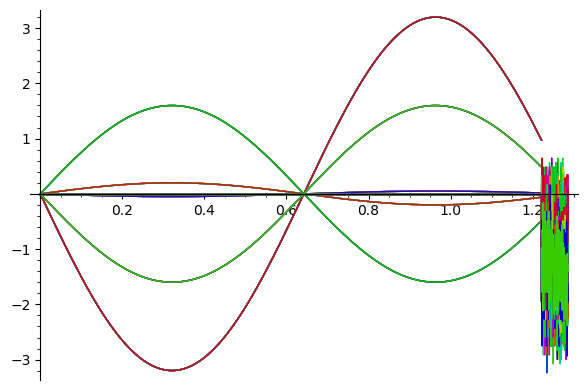

In [476]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

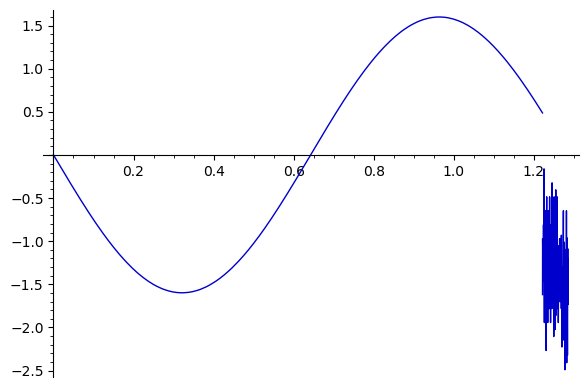

In [477]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol[i](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [478]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[-(1.01795683349045e-15)*pi*cos(2.44542591410169*z)*sin(2.44542591410169*z)]

In [479]:
[Abraham_f_z_sol[0](rh,ph,z,1).subs(rh == rho).subs(ph == phi) for rho in [int(a_val)] for phi in [0]]

[-(1.01795683349045e-15)*pi*cos(2.44542591410169*z)*sin(2.44542591410169*z)]

In [480]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[-1/959335865600*((3.04665617463936*pi*cos(1.46469191705847*z) - 9.43166178210555*pi*sin(1.46469191705847*z))*(-4.14147654844952e11*pi*cos(1.46469191705847*z) - 1.33779766386418e11*pi*sin(1.46469191705847*z)) - (2.89039412429117e10*pi^2*cos(1.46469191705847*z) - 8.94791477431039e10*pi^2*sin(1.46469191705847*z))*(-43.6537529343066*cos(1.46469191705847*z) - 14.1012240468397*sin(1.46469191705847*z)))/pi]

In [481]:
[Abraham_f_z_sol[1](rh,ph,z,1).subs(rh == rho, ph == phi) for rho in [int(a_val)] for phi in [0]]

[-1/959335865600*((3.04665617463936*pi*cos(1.46469191705847*z) - 9.43166178210555*pi*sin(1.46469191705847*z))*(-4.14147654844952e11*pi*cos(1.46469191705847*z) - 1.33779766386418e11*pi*sin(1.46469191705847*z)) - (2.89039412429117e10*pi^2*cos(1.46469191705847*z) - 8.94791477431039e10*pi^2*sin(1.46469191705847*z))*(-43.6537529343066*cos(1.46469191705847*z) - 14.1012240468397*sin(1.46469191705847*z)))/pi]

In [482]:
Abraham_f_z_sol_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh += [lambda r,p,z, a0, i=i: Abraham_f_z_sol[i](r,p,z, a0) * r]

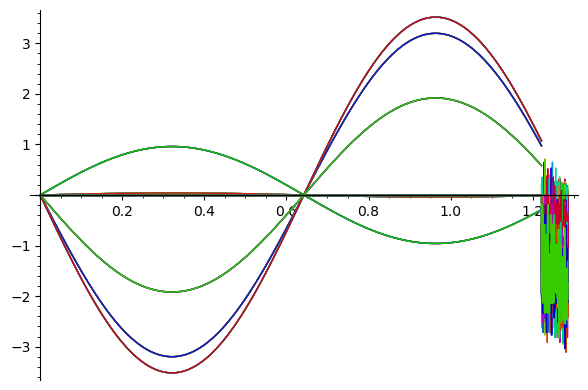

In [483]:
plt = sage.plot.graphics.Graphics()

for i in range(n_layers):
    plt += plot ([Abraham_f_z_sol_rh[i](rh,ph,z, 1).subs(rh == rho).subs(ph == phi) for rho in [0..int(a_val)] for phi in [0 .. 2*pi]],(z, h_sol[i], h_sol[i+1]))
plt.show ()

In [484]:
Abraham_f_z_sol_rh_int_ph = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph += [lambda r,z,a0, i=i: 
                                  num_int(
                                      lambda p : Abraham_f_z_sol_rh[i](r,p,z,a0), 
                                      0, 2*pi)
                                 ]

In [485]:
Abraham_f_z_sol_rh_int_ph_int_rh = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh += [lambda rh1, rh2, zz, a0, i=i: 
                                         num_int(
                                             lambda r : Abraham_f_z_sol_rh_int_ph[i](r,zz,a0),
                                             rh1, rh2)
                                        ]

In [486]:
Abraham_f_z_sol_rh_int_ph_int_rh_int_z = []
for i in range(n_layers):
    Abraham_f_z_sol_rh_int_ph_int_rh_int_z += [lambda rh1, rh2, z1, z2, a0, i=i: 
                                         num_int(
                                             lambda zz : Abraham_f_z_sol_rh_int_ph_int_rh[i](rh1, rh2, zz, a0),
                                             z1, z2)
                                        ]

In [487]:
if calc_Abraham_force:
    Abraham_f_z = []
    for i in range(n_layers):
        Abraham_f_z += [Abraham_f_z_sol_rh_int_ph_int_rh_int_z [i](0, a_val, h_sol[i],  h_sol[i+1], 1)]

In [488]:
if calc_Abraham_force:
    print(Abraham_f_z)

In [489]:
if calc_Abraham_force:
    print(sum(Abraham_f_z))

In [490]:
#Abraham_f_z_0 + Abraham_f_z_1

In [491]:
sum_f_z = sum_surf_f_z
if calc_Abraham_force:
    sum_f_z += sum(Abraham_f_z)

In [492]:
sum_f_z

-58.5233549020356

In [493]:
sum_f_z / (field_energy)

-0.0205550854298957

In [494]:
S = pi.n() * a_val^2
S

452.389342116930

In [495]:
V = b_sol * S
V

581.663496332641

In [496]:
h_sol

[0, 1.22147068923030, 1.28575862024242]

In [497]:
# мкм
b_sol*10*1000 

12857.5862024242

In [498]:
field_energy

2847.14724741149

In [499]:
# эрг / куб см
(field_energy)/V

4.89483570030199

In [500]:
# волоконная оптика 1 мВт / 9 мкм
# 10^4 эрг в сек / 0.0009 см
w = (10^4 /(pi.n()*0.00045^2*c)).subs(c_value)
w # эрг в куб см

0.524329625568014

https://iopscience.iop.org/article/10.1088/1367-2630/18/5/053042

A uniform electric field $E={10}^{6}$ V m−1 along the $z$ direction is applied. This electric field corresponds to an average laser intensity of ${I}_{0}=1.33\ \mathrm{mW}\;\mu {{\rm{m}}}^{-2}$ as used under typical experiment conditions

In [501]:
# 1.33 мВт / 1 мкм^2
# 1.33 * 10^4 эрг в сек / 0.0001 см
w = (1.33 * 10^4 /(0.0001^2*c)).subs(c_value)
w # эрг в куб см

44.3640246613542

In [502]:
# дин
F_z = sum_f_z / (field_energy) * w
F_z

-0.911906316928138

In [503]:
# Ньютон
F_z / 10^5

-9.11906316928138e-6

In [504]:
# gramm
F_z / 10^5 *101

-0.000921025380097419

In [505]:
# Толщина серебряного слоя для всех зеркал должна быть не менее 0,15 мкм
# вес одной ячейки
m_of_Layer_gramm = V/2 * 3.95 + V/2 * 4.23 + V/2 * 10.49
m_of_Layer_gramm

5429.82873826521

In [506]:
omega_value[0].rhs().n()

2.98046134067857e10

In [507]:
# число ячеек в #сантиметре
nLayers_per_sm = 1/(15e-06 + b_sol)
nLayers_per_sm

0.777741885707267

In [508]:
# вес сантиметрово
m_of_Layer_gramm * nLayers_per_sm / 1000

4.22300524196589

In [509]:
# кг / см толщины
1.0/(15e-06 + b_sol) * F_z / 10^5 *101/1000

-7.16320015901219e-7